In [445]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [446]:
from IPython.display import Image

In [447]:
import numpy as np
import pandas as pd

In [448]:
import seaborn as sns
from dateutil.parser import parse 
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
plt.rcParams.update({'figure.figsize': (50, 20), 'figure.dpi': 120})
mpl.rcParams['figure.figsize'] = (20,7)
# mpl.rcParams['axis.grid'] = False

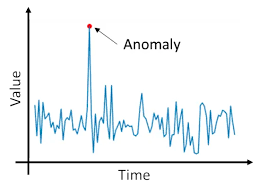

In [449]:
Image("E:/ANALYSIS/04_Images/ana1.png", width = 400, height = 200)

https://nix-united.com/blog/machine-learning-for-anomaly-detection-in-depth-overview/
https://docs.wavefront.com/query_language_statistical_functions_anomalies.html

Time Series data should be taken at regular interval the data should be continious.

Components of Time series data.

1. Trend
2. Seasonality
3. Irregularity
4. Cyclic

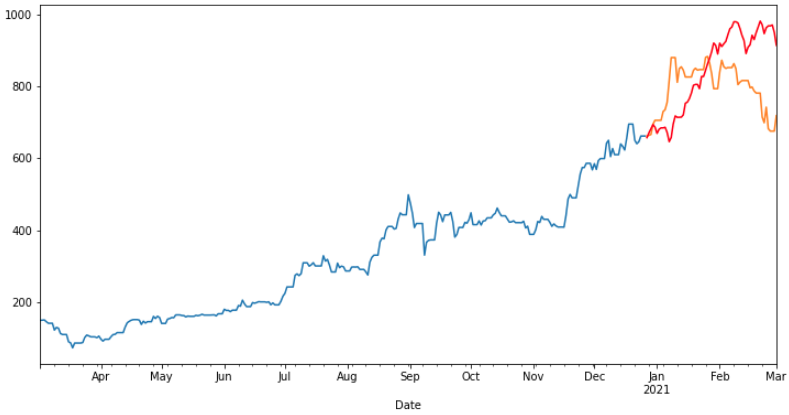

In [450]:
Image("E:/ANALYSIS/04_Images/arima.png", width = 400, height = 200)

In [451]:
# Import as Dataframe
df_raw = pd.read_csv('E:/ANALYSIS/03_Working/read1/dataModel_TS_v2.csv')
df_raw.head()
print("\n Data Types")
df_raw.dtypes

Case_Number Date_Time_Opened Date_Time_Closed  Version_Number
0     16109808   01-01-20 23:08   02-01-20 12:32               7
1     16109808   01-01-20 23:08   02-01-20 12:32              28
2     16110243    02-01-20 3:11    02-01-20 3:46               1
3     16110554    02-01-20 7:30    24-01-20 2:46               7
4     16110664    02-01-20 8:14    06-01-20 7:30               2


 Data Types


Case_Number          int64
Date_Time_Opened    object
Date_Time_Closed    object
Version_Number       int64
dtype: object

In [ ]:
# Importing the Data

In [452]:
# Import as Dataframe
df = pd.read_csv('E:/ANALYSIS/03_Working/read1/dataModel_TS_v2.csv', parse_dates=['Date_Time_Opened'], index_col=['Date_Time_Opened'], dayfirst=True)

In [453]:
df.head()

Case_Number Date_Time_Closed  Version_Number
Date_Time_Opened                                                 
2020-01-01 23:08:00     16109808   02-01-20 12:32               7
2020-01-01 23:08:00     16109808   02-01-20 12:32              28
2020-01-02 03:11:00     16110243    02-01-20 3:46               1
2020-01-02 07:30:00     16110554    24-01-20 2:46               7
2020-01-02 08:14:00     16110664    06-01-20 7:30               2

In [ ]:
# Adding a new column required for Time_Series Analysis ("no_of_cases")

In [454]:
no_of_cases = []
for row in df['Case_Number']:
    if row > 1.0:no_of_cases.append(1)
df['no_of_cases'] = no_of_cases

In [455]:
df.head()

Case_Number Date_Time_Closed  Version_Number  no_of_cases
Date_Time_Opened                                                              
2020-01-01 23:08:00     16109808   02-01-20 12:32               7            1
2020-01-01 23:08:00     16109808   02-01-20 12:32              28            1
2020-01-02 03:11:00     16110243    02-01-20 3:46               1            1
2020-01-02 07:30:00     16110554    24-01-20 2:46               7            1
2020-01-02 08:14:00     16110664    06-01-20 7:30               2            1

In [ ]:
# Dropping irrelevant Columns

In [456]:
df_ts = df.drop(['Case_Number', 'Date_Time_Closed','Version_Number'], axis = 1)

In [457]:
df_ts.head()

no_of_cases
Date_Time_Opened                
2020-01-01 23:08:00            1
2020-01-01 23:08:00            1
2020-01-02 03:11:00            1
2020-01-02 07:30:00            1
2020-01-02 08:14:00            1

In [ ]:
#Aggregating Number of Cases on daily basis

In [458]:
df_daily = df_ts.resample('D').sum()

In [459]:
df_daily.to_csv("E:/ANALYSIS/03_Working/save/df_daily_fpV2.csv")

In [460]:
df_daily.head(20)

no_of_cases
Date_Time_Opened             
2020-01-01                  2
2020-01-02                 32
2020-01-03                 31
2020-01-04                  2
2020-01-05                  0
2020-01-06                 49
2020-01-07                 46
2020-01-08                 38
2020-01-09                 36
2020-01-10                 26
2020-01-11                  1
2020-01-12                  1
2020-01-13                 32
2020-01-14                 32
2020-01-15                 23
2020-01-16                 32
2020-01-17                 31
2020-01-18                  3
2020-01-19                  0
2020-01-20                 40

In [461]:
df_daily.tail(20)

no_of_cases
Date_Time_Opened             
2022-01-12                168
2022-01-13                168
2022-01-14                147
2022-01-15                  1
2022-01-16                  0
2022-01-17                147
2022-01-18                160
2022-01-19                173
2022-01-20                162
2022-01-21                144
2022-01-22                  3
2022-01-23                  2
2022-01-24                160
2022-01-25                154
2022-01-26                172
2022-01-27                172
2022-01-28                126
2022-01-29                  3
2022-01-30                  0
2022-01-31                143

In [462]:
df_daily['no_of_cases'] = df_daily['no_of_cases'].replace([0],1)

In [463]:
df_daily.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', name='Date_Time_Opened', length=762, freq='D')

In [464]:
pd.date_range(start = '2020-01-01', end = '2022-01-31' ).difference(df_daily.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

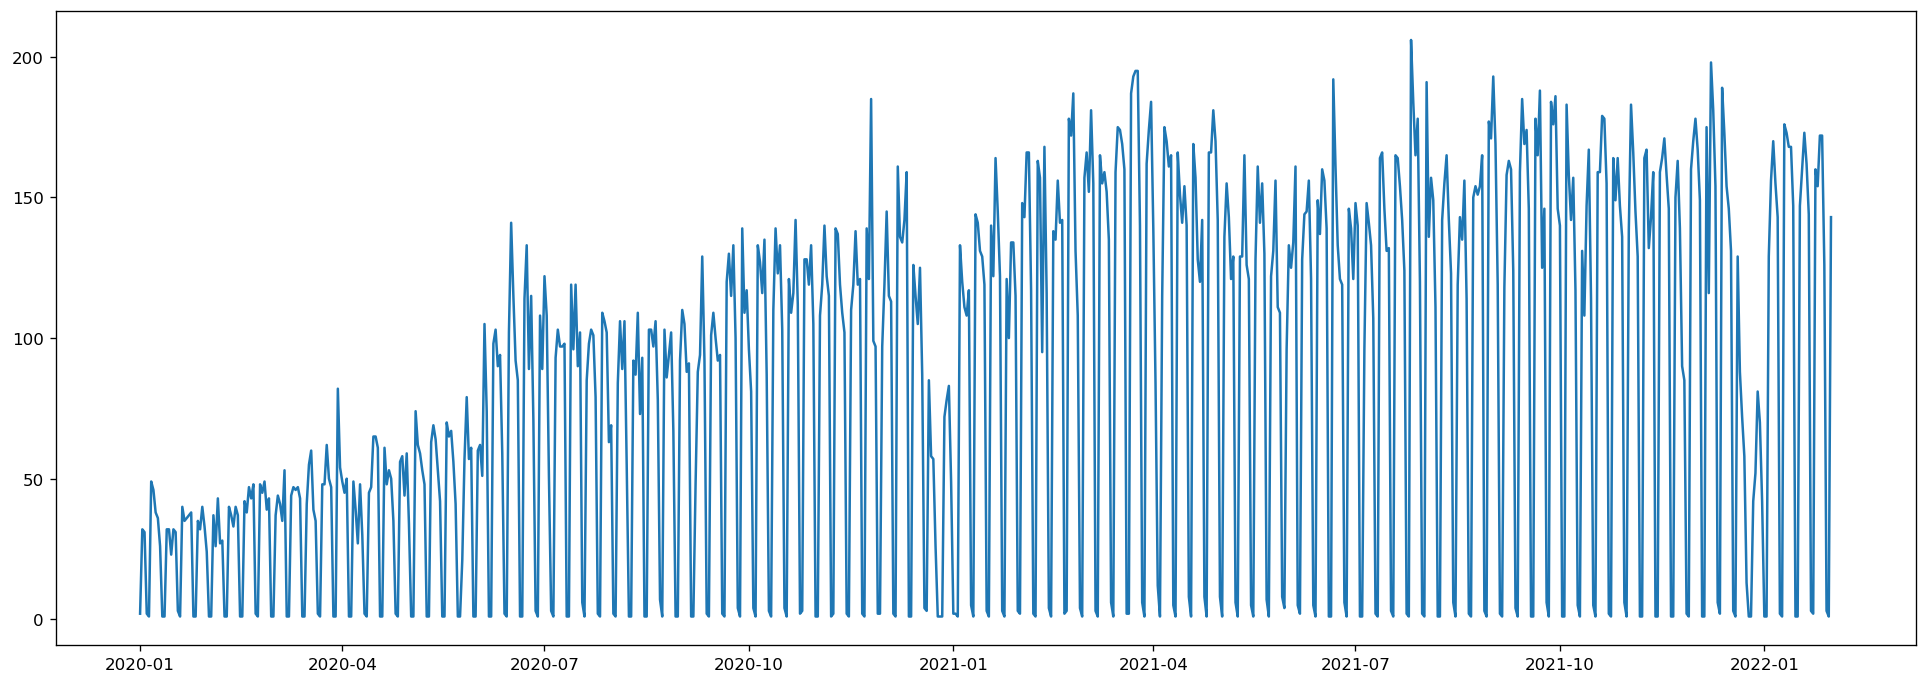

In [465]:
#GET RANGE
#PLOTTING THE TIME SERIES
plt.plot(df_daily)

### SUMMARY STATISTICS

In [466]:
X_new = df_daily.values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=58.367454, mean2=105.215223
variance1=2233.088075, variance2=4849.953679


array([[<AxesSubplot:title={'center':'no_of_cases'}>]], dtype=object)

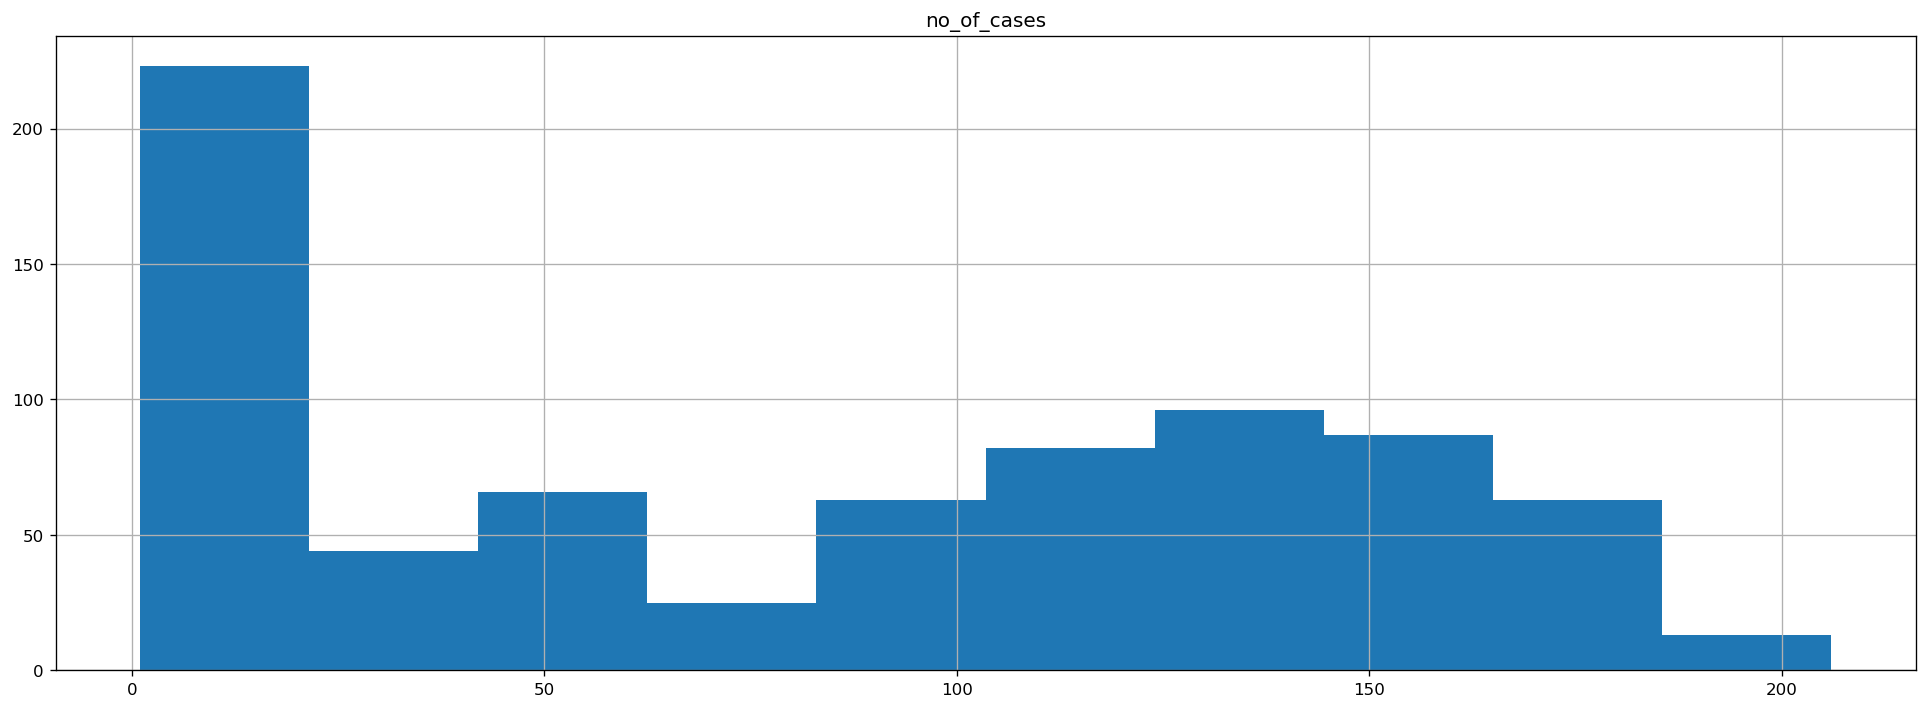

In [467]:
# from pandas import read_csv
from matplotlib import pyplot
df_daily.hist()
pyplot.show()

Values not looking like Gaussian, therefore mean & variance values are less meaningful
This squashed distribution of the observations may be another indicator of a non-stationary time series.

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

This may suggest an exponential growth from season to season.
A log transform can be used to flatten out exponential change back to a linear relationship.

In [468]:
from numpy import log
X_log = log(df_daily.values)

(array([138.,  36.,  24.,  22.,   2.,   3.,  42.,  78., 142., 275.]),
 array([0.        , 0.53278762, 1.06557523, 1.59836285, 2.13115047,
        2.66393808, 3.1967257 , 3.72951332, 4.26230094, 4.79508855,
        5.32787617]),
 <BarContainer object of 10 artists>)

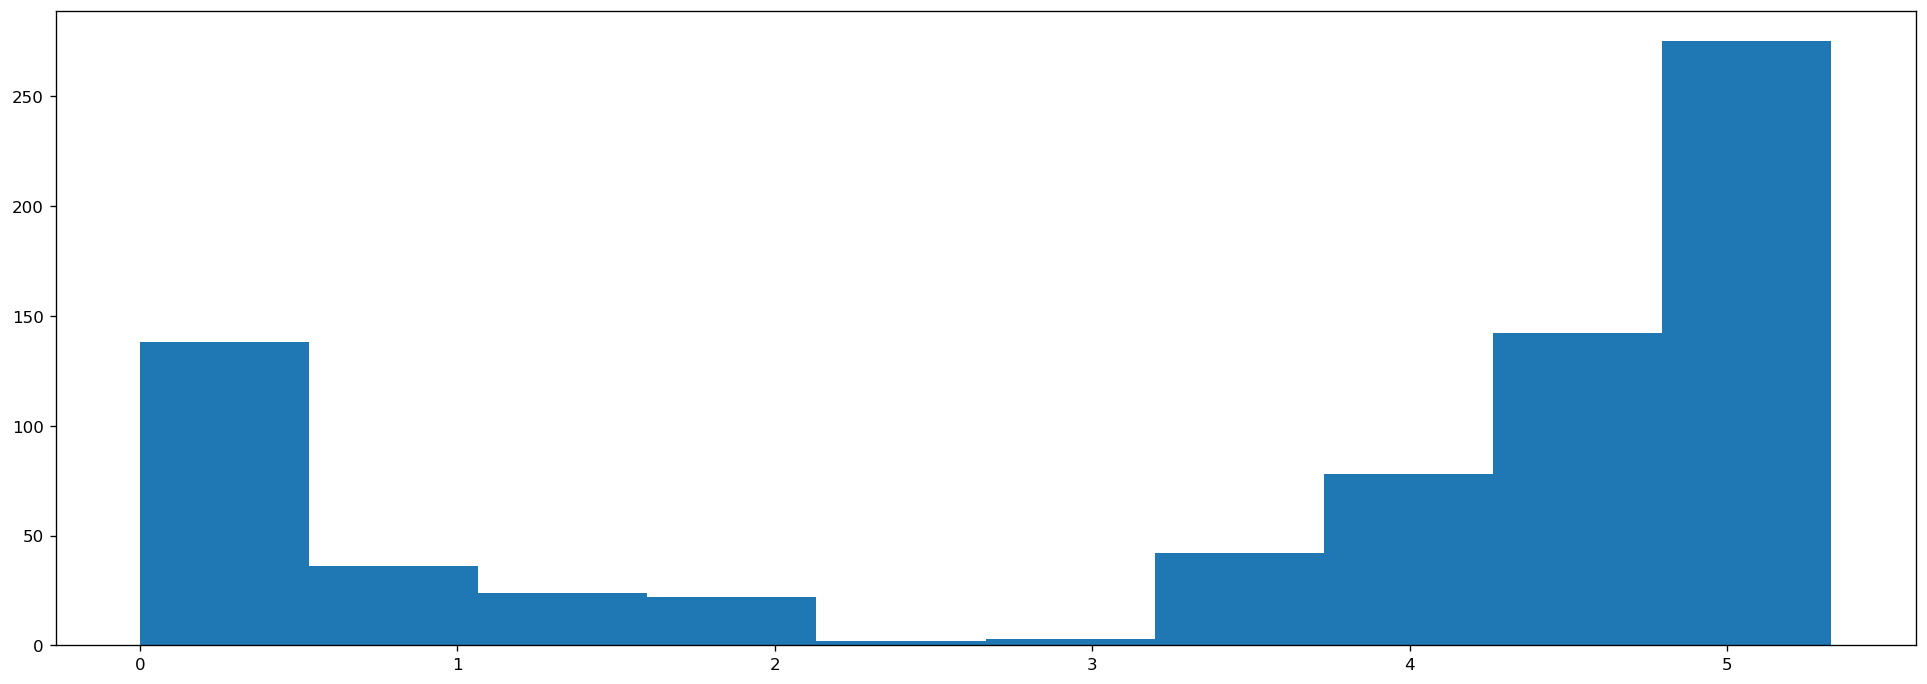

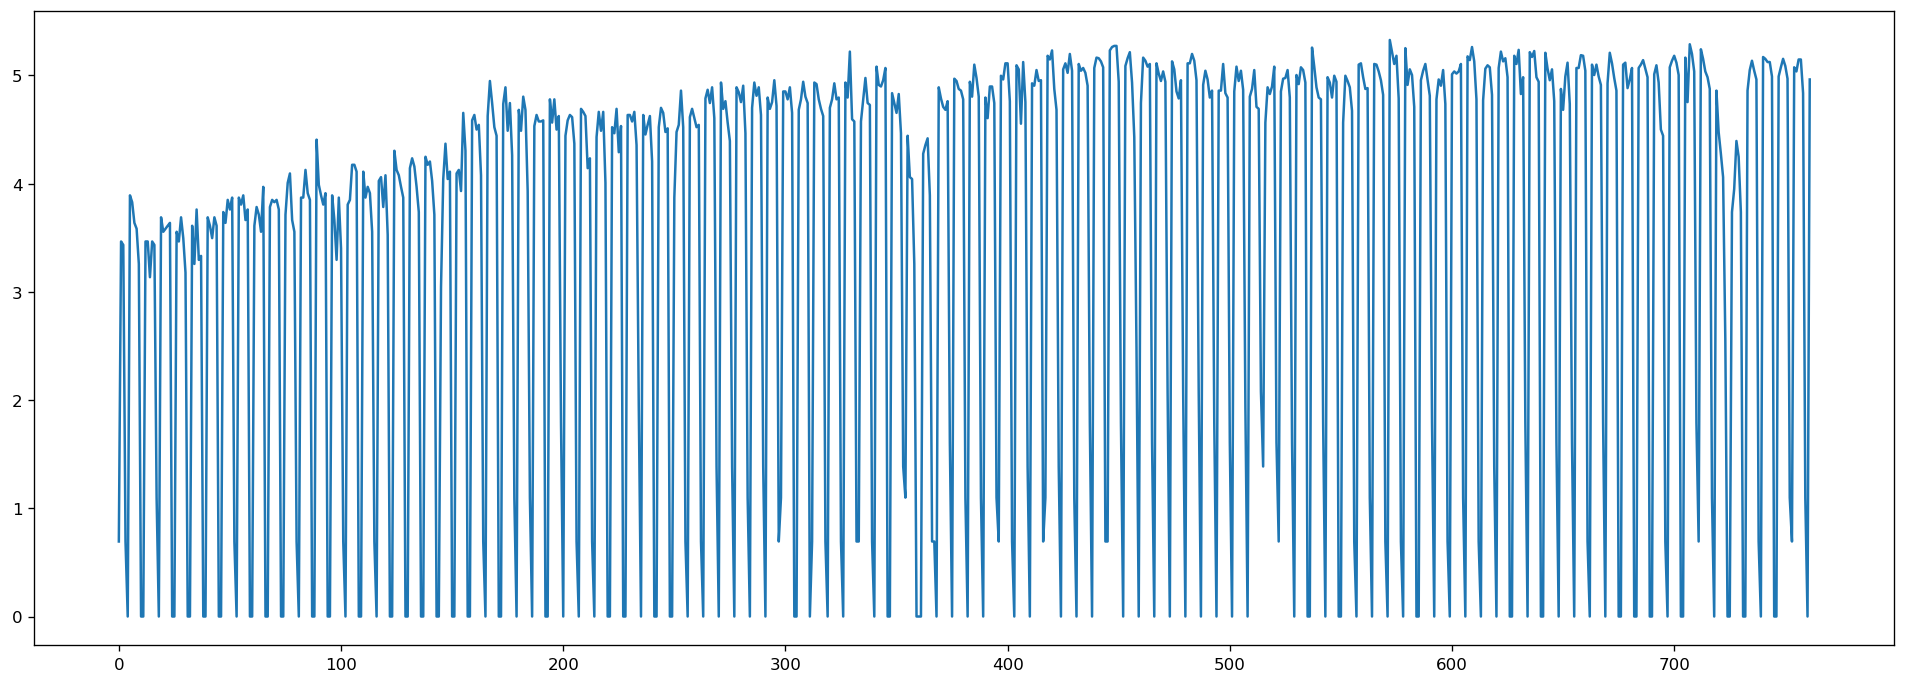

In [469]:
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

In [470]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X_new_log = df_daily.values
X_new_log = log(X_new_log)
split_log = len(X_new_log) / 2
X1_log, X2_log = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1_log.mean(), X2_log.mean()
var1_log, var2_log = X1_log.var(), X2_log.var()
print('mean1=%f, mean2=%f' % (mean1_log, mean2_log))
print('variance1=%f, variance2=%f' % (var1_log, var2_log))

mean1=3.124001, mean2=3.699236
variance1=3.558392, variance2=4.139529




We can use a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the Student t-test, but things get tricky because of the serial correlation between values.


In [471]:
ts = df_daily['no_of_cases']
ts.head(10)

Date_Time_Opened
2020-01-01     2
2020-01-02    32
2020-01-03    31
2020-01-04     2
2020-01-05     1
2020-01-06    49
2020-01-07    46
2020-01-08    38
2020-01-09    36
2020-01-10    26
Freq: D, Name: no_of_cases, dtype: int64

### STATISTICAL TEST
Augmented Dickey Fuller Test

In [472]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

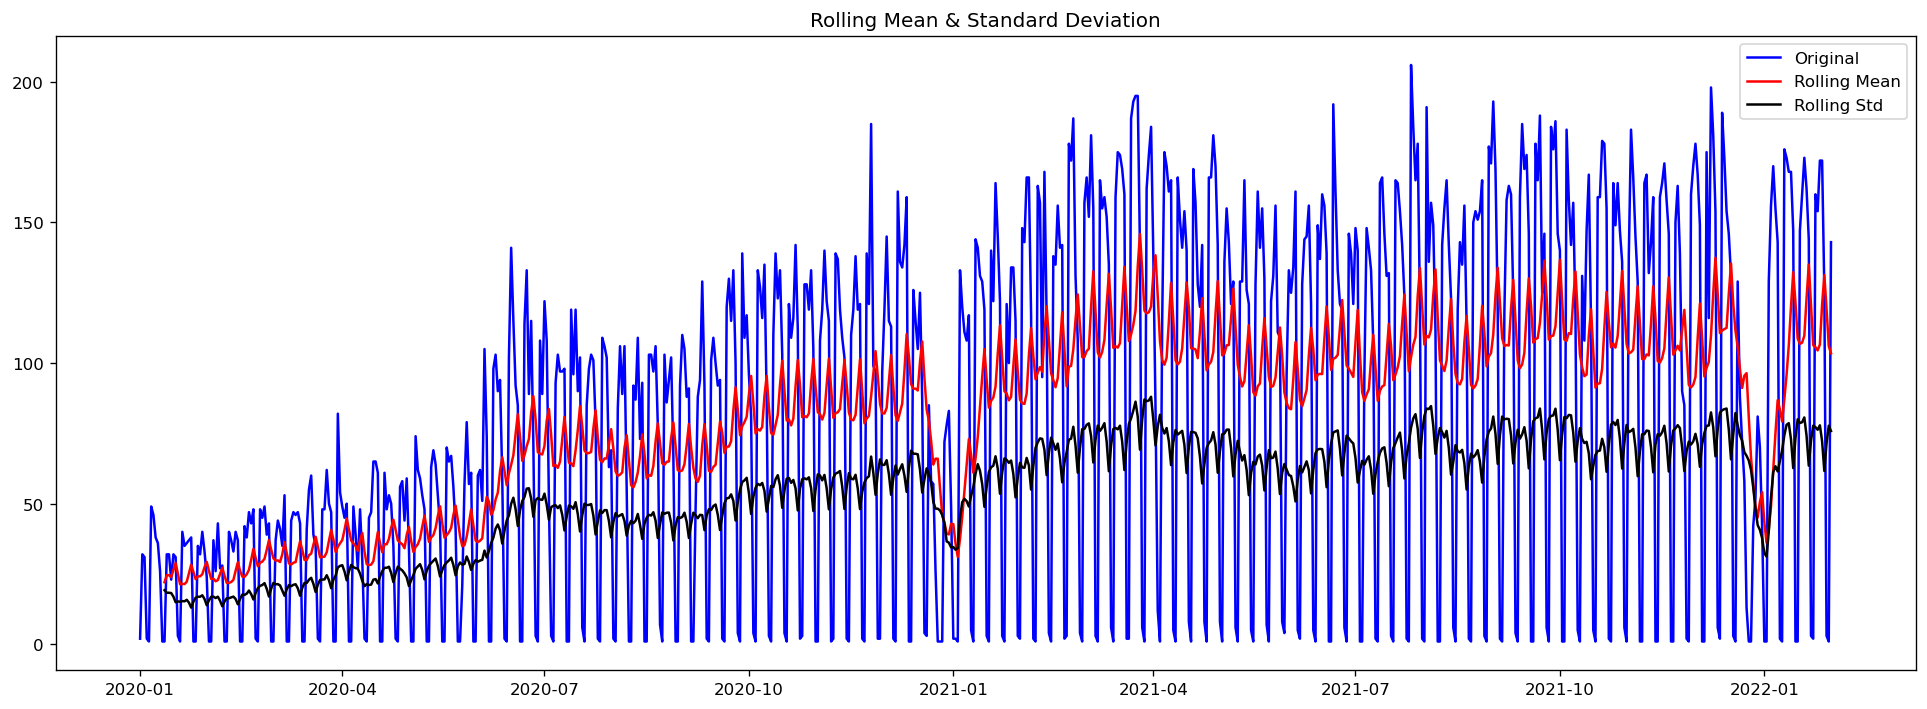

Results of Dickey-Fuller Test:
Test Statistic                  -2.021681
p-value                          0.277149
#Lags Used                      20.000000
Number of Observations Used    741.000000
Critical Value (1%)             -3.439206
Critical Value (5%)             -2.865448
Critical Value (10%)            -2.568851
dtype: float64


In [473]:
test_stationarity(ts)

In [474]:
ts.empty

False

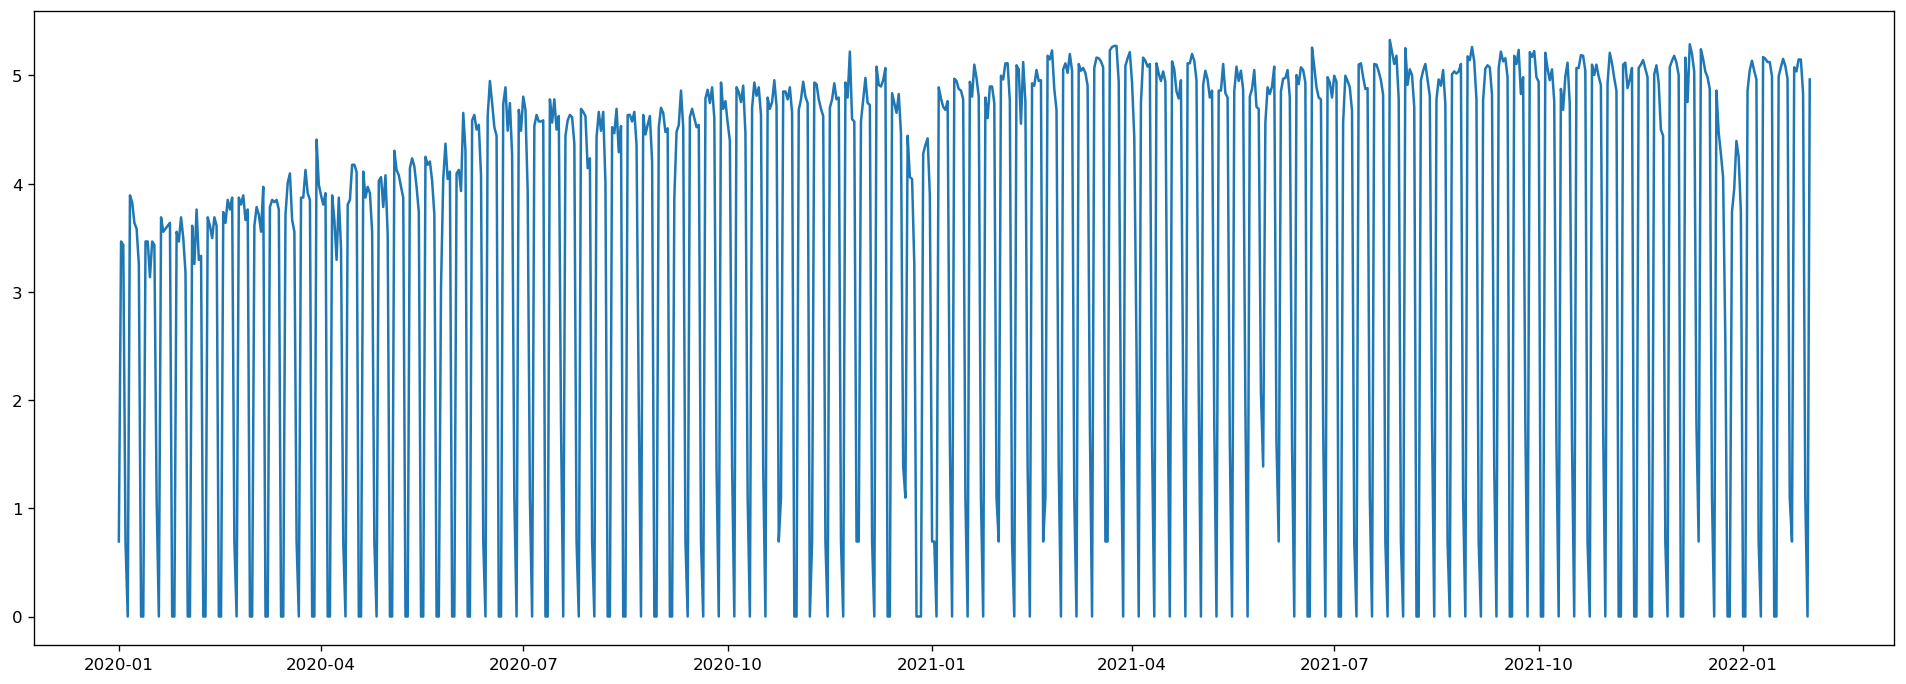

In [475]:
#MAKING TS STATIONARY
ts_log = np.log(ts)
plt.plot(ts_log)

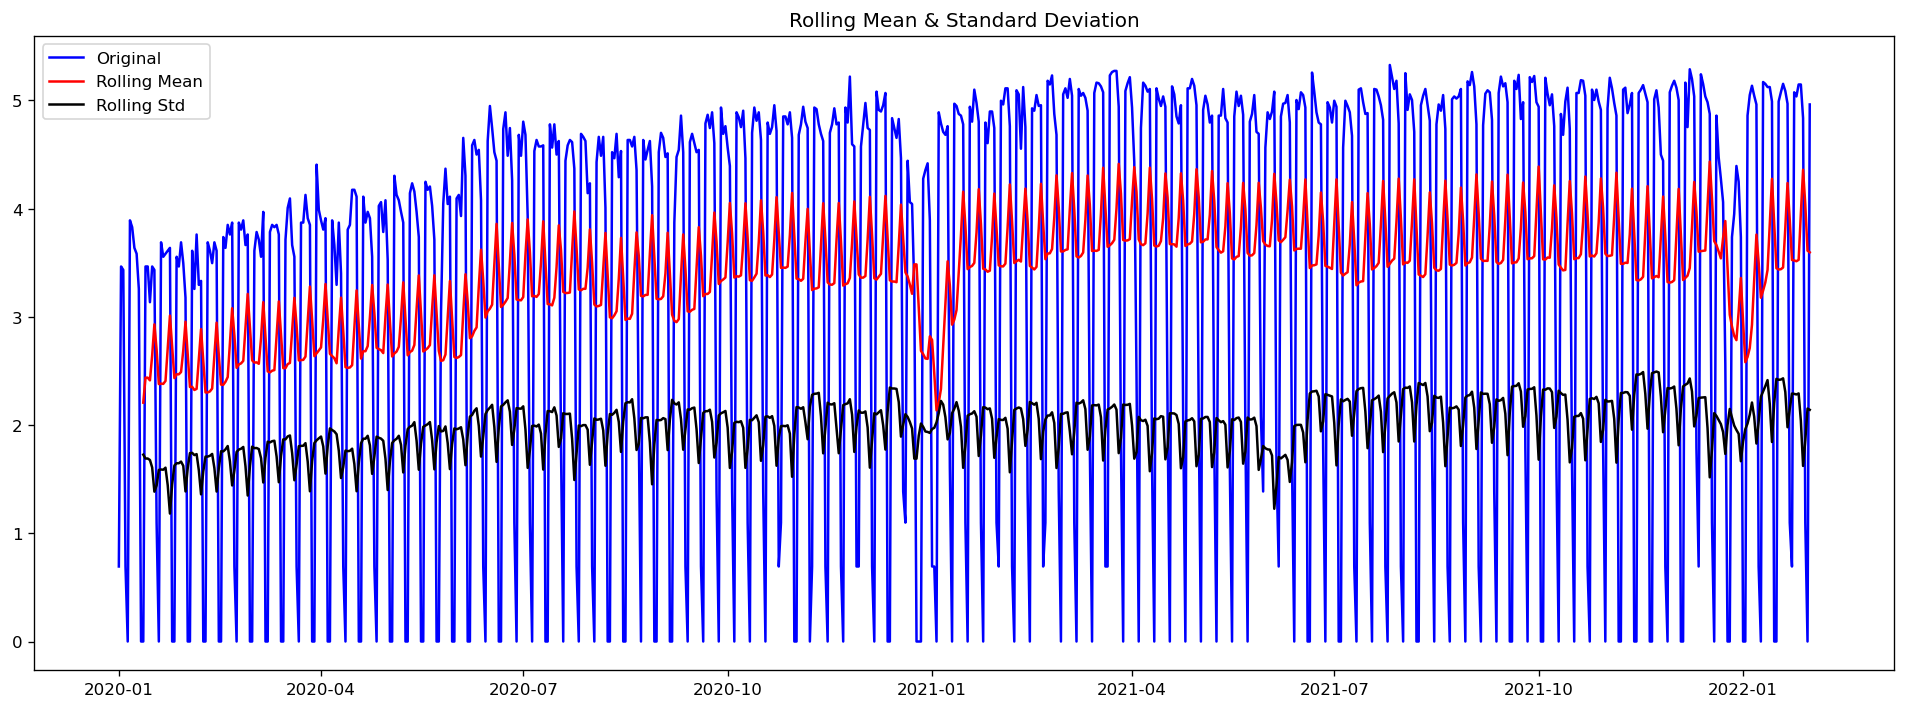

Results of Dickey-Fuller Test:
Test Statistic                  -2.421079
p-value                          0.135875
#Lags Used                      20.000000
Number of Observations Used    741.000000
Critical Value (1%)             -3.439206
Critical Value (5%)             -2.865448
Critical Value (10%)            -2.568851
dtype: float64


In [476]:
test_stationarity(ts_log)

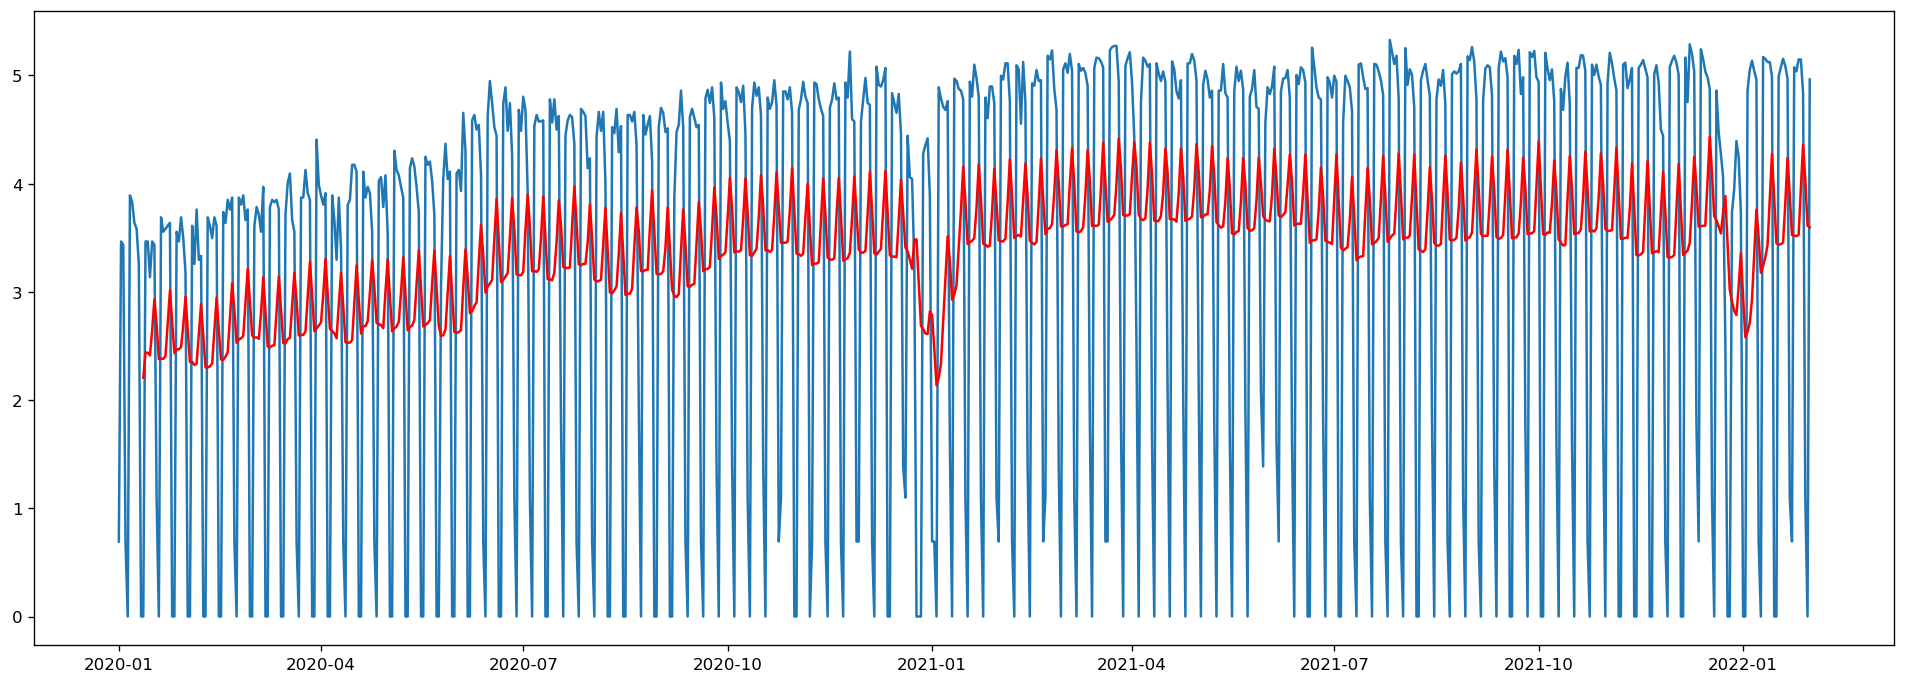

In [477]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [478]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Date_Time_Opened
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
Freq: D, Name: no_of_cases, dtype: float64

In [479]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

Date_Time_Opened
2020-01-12   -2.207140
2020-01-13    1.027547
2020-01-14    1.027547
2020-01-15    0.722180
2020-01-16    0.821372
Freq: D, Name: no_of_cases, dtype: float64

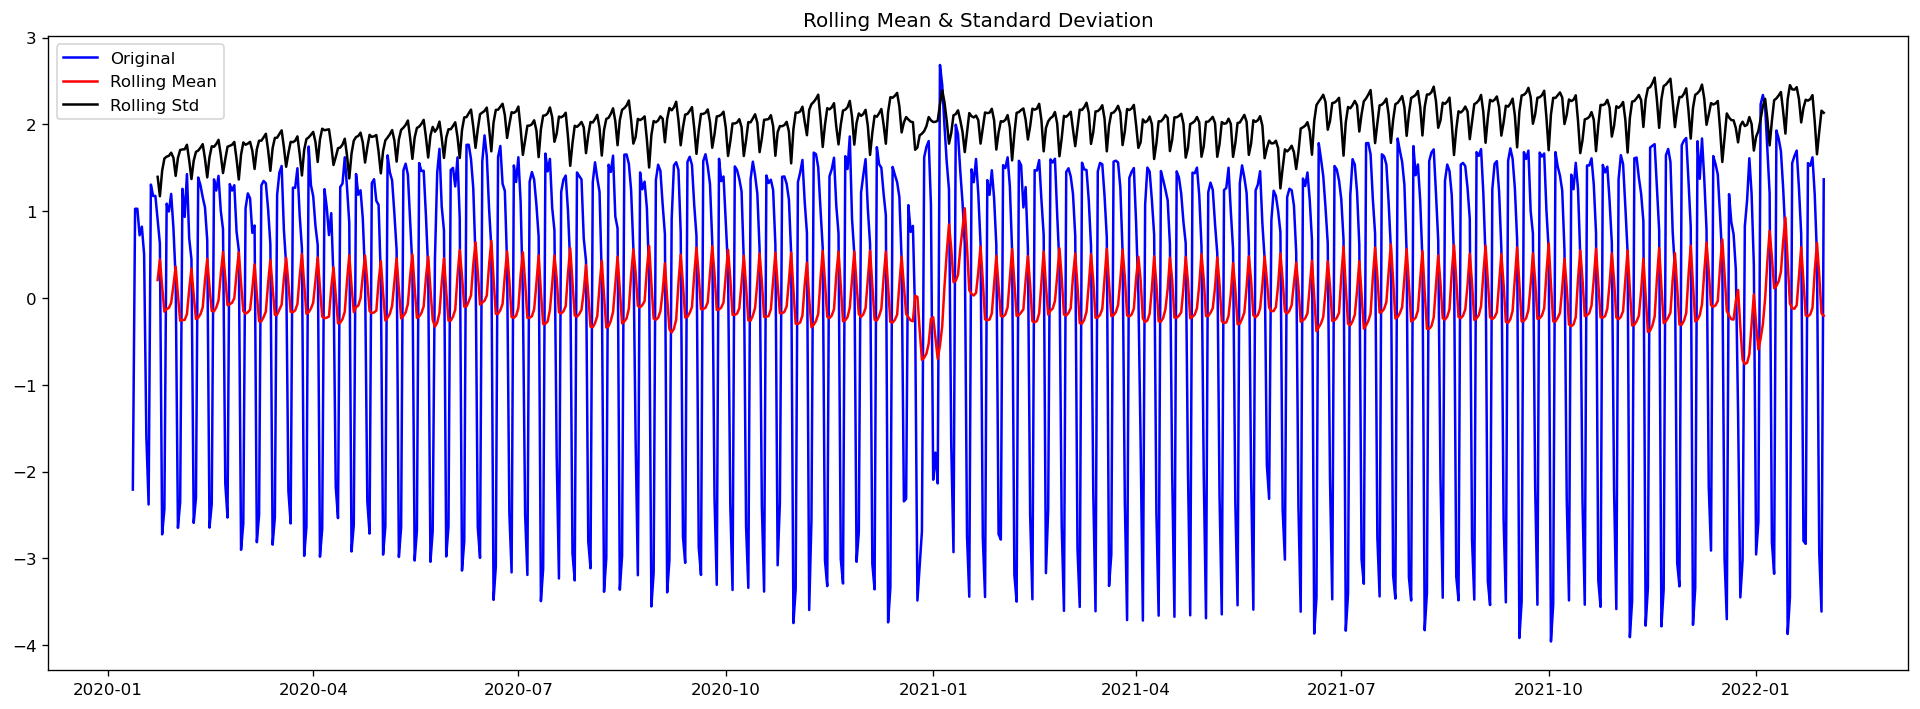

Results of Dickey-Fuller Test:
Test Statistic                -6.955861e+00
p-value                        9.433092e-10
#Lags Used                     2.000000e+01
Number of Observations Used    7.300000e+02
Critical Value (1%)           -3.439340e+00
Critical Value (5%)           -2.865507e+00
Critical Value (10%)          -2.568883e+00
dtype: float64


In [480]:
#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

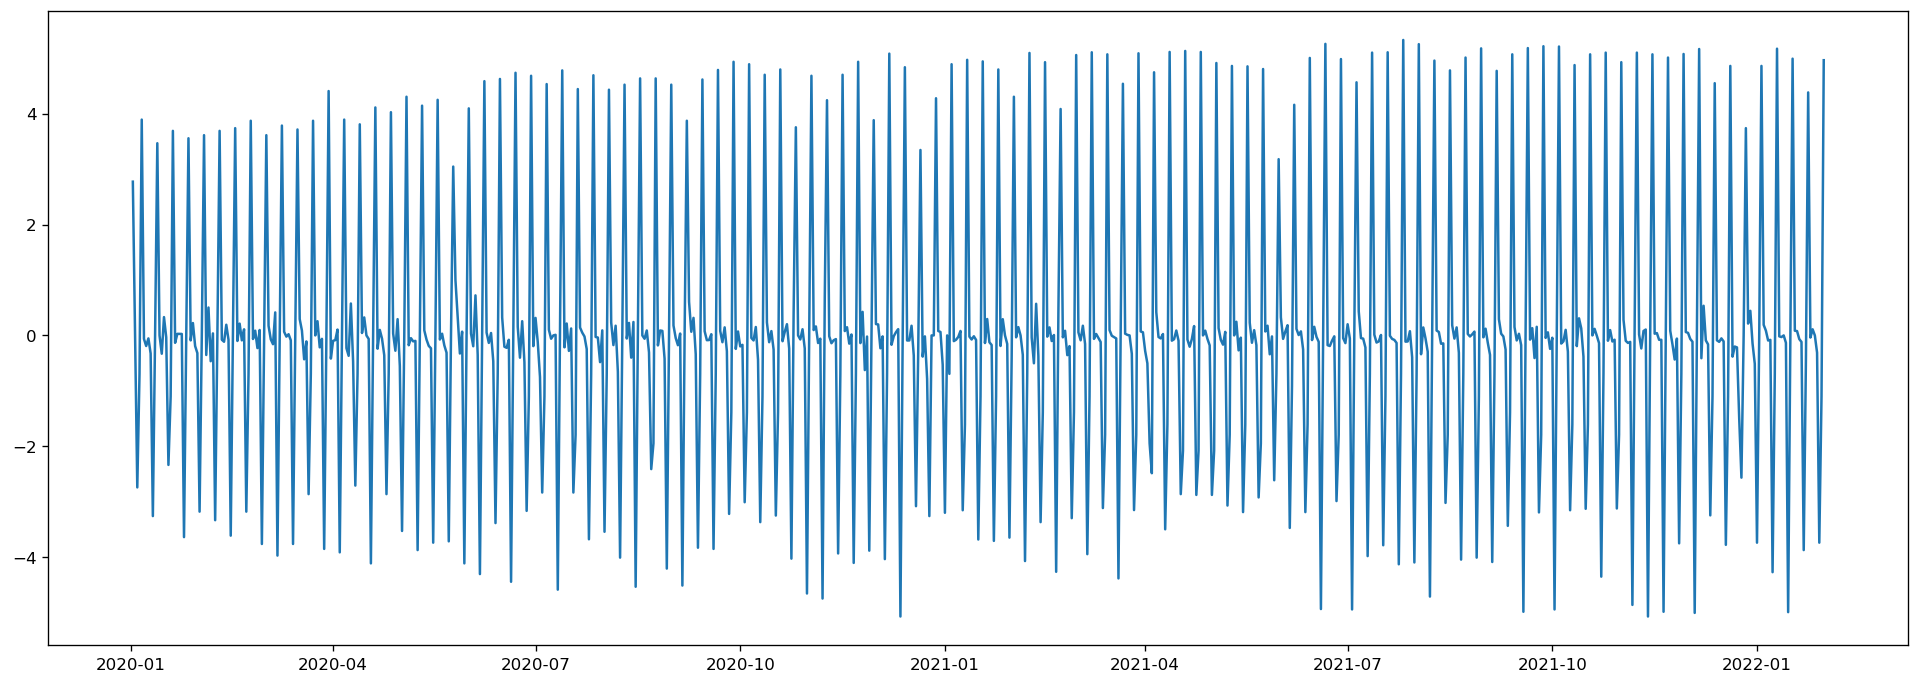

In [481]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

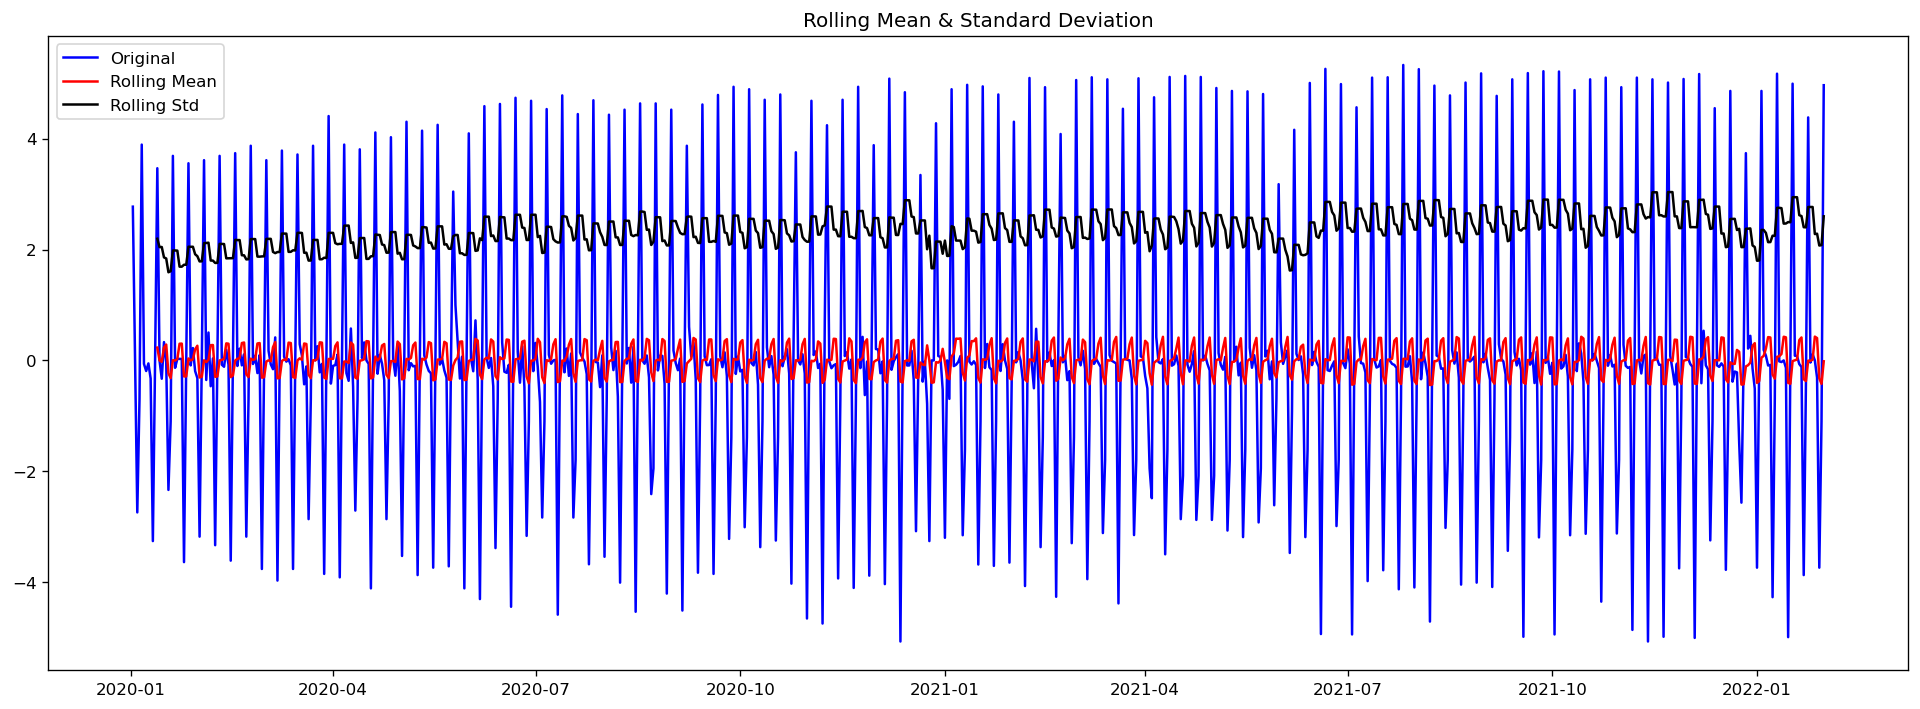

Results of Dickey-Fuller Test:
Test Statistic                -1.108186e+01
p-value                        4.291363e-20
#Lags Used                     1.900000e+01
Number of Observations Used    7.410000e+02
Critical Value (1%)           -3.439206e+00
Critical Value (5%)           -2.865448e+00
Critical Value (10%)          -2.568851e+00
dtype: float64


In [482]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### DECOMPOSITION

In [483]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [484]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

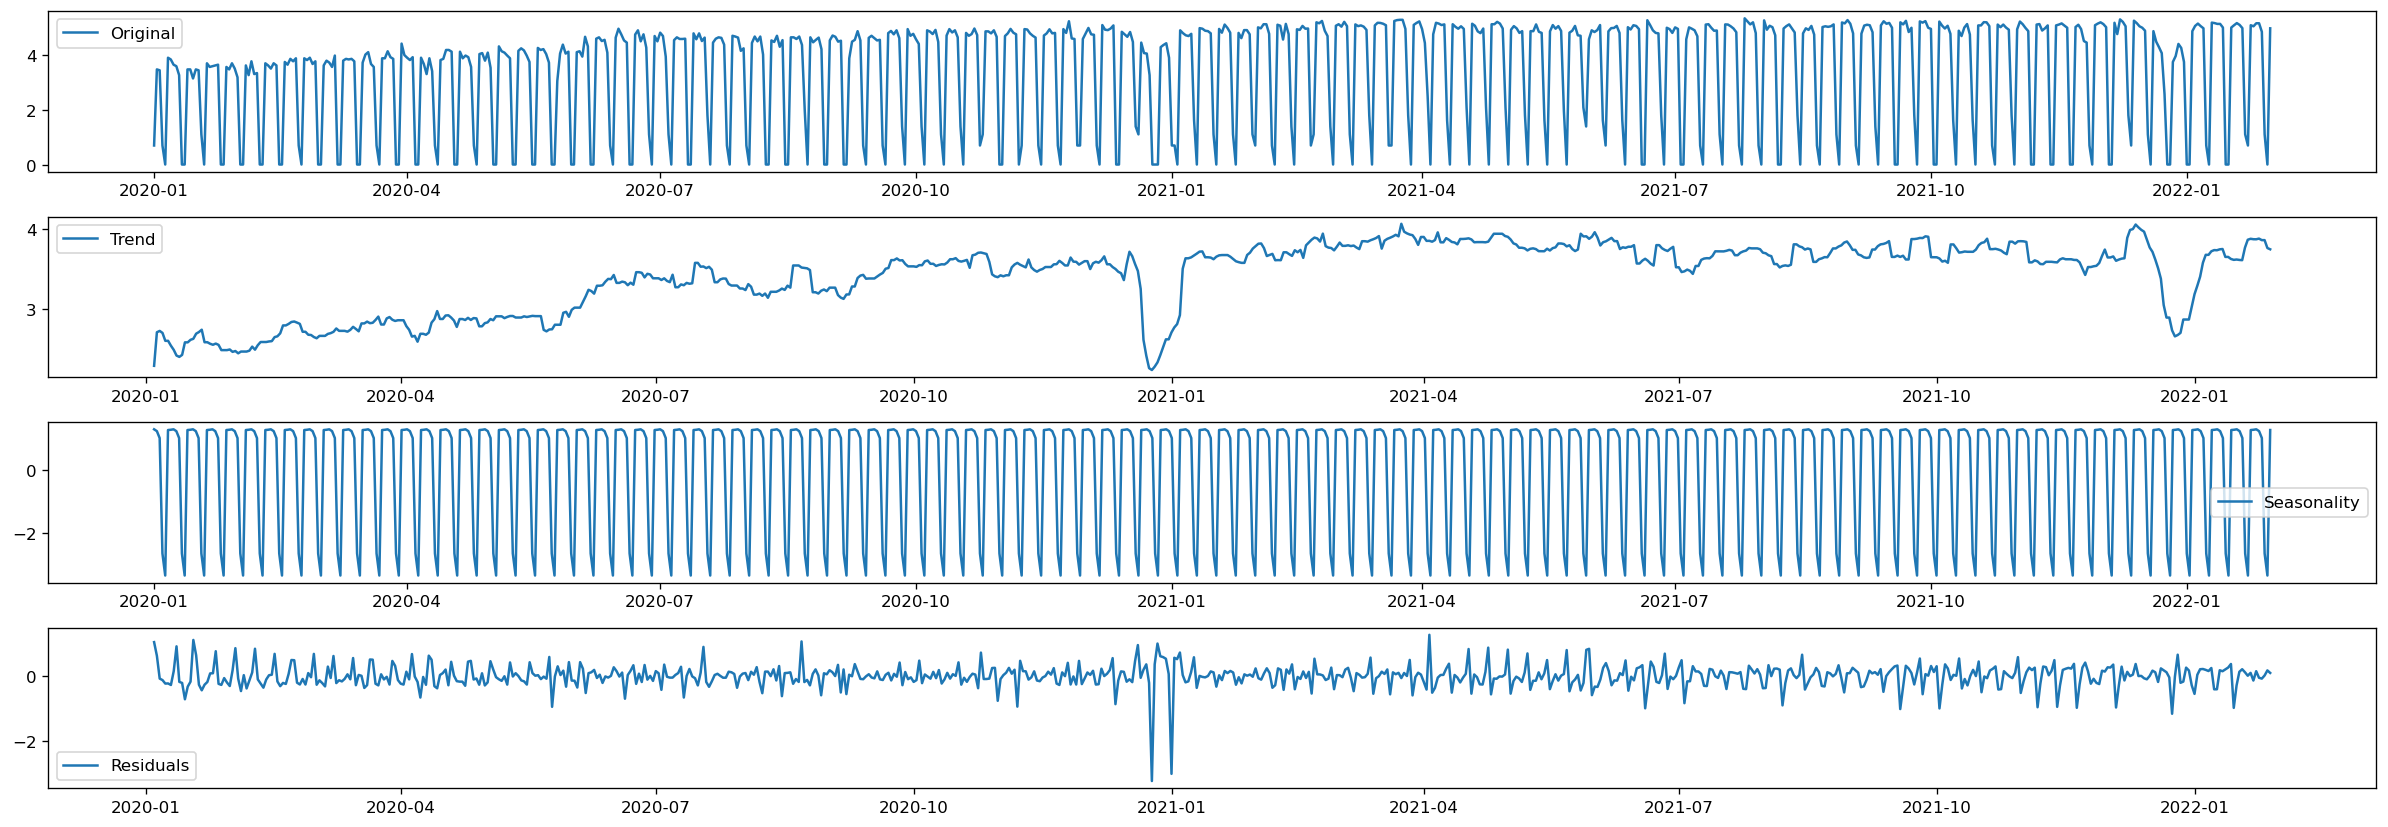

In [485]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

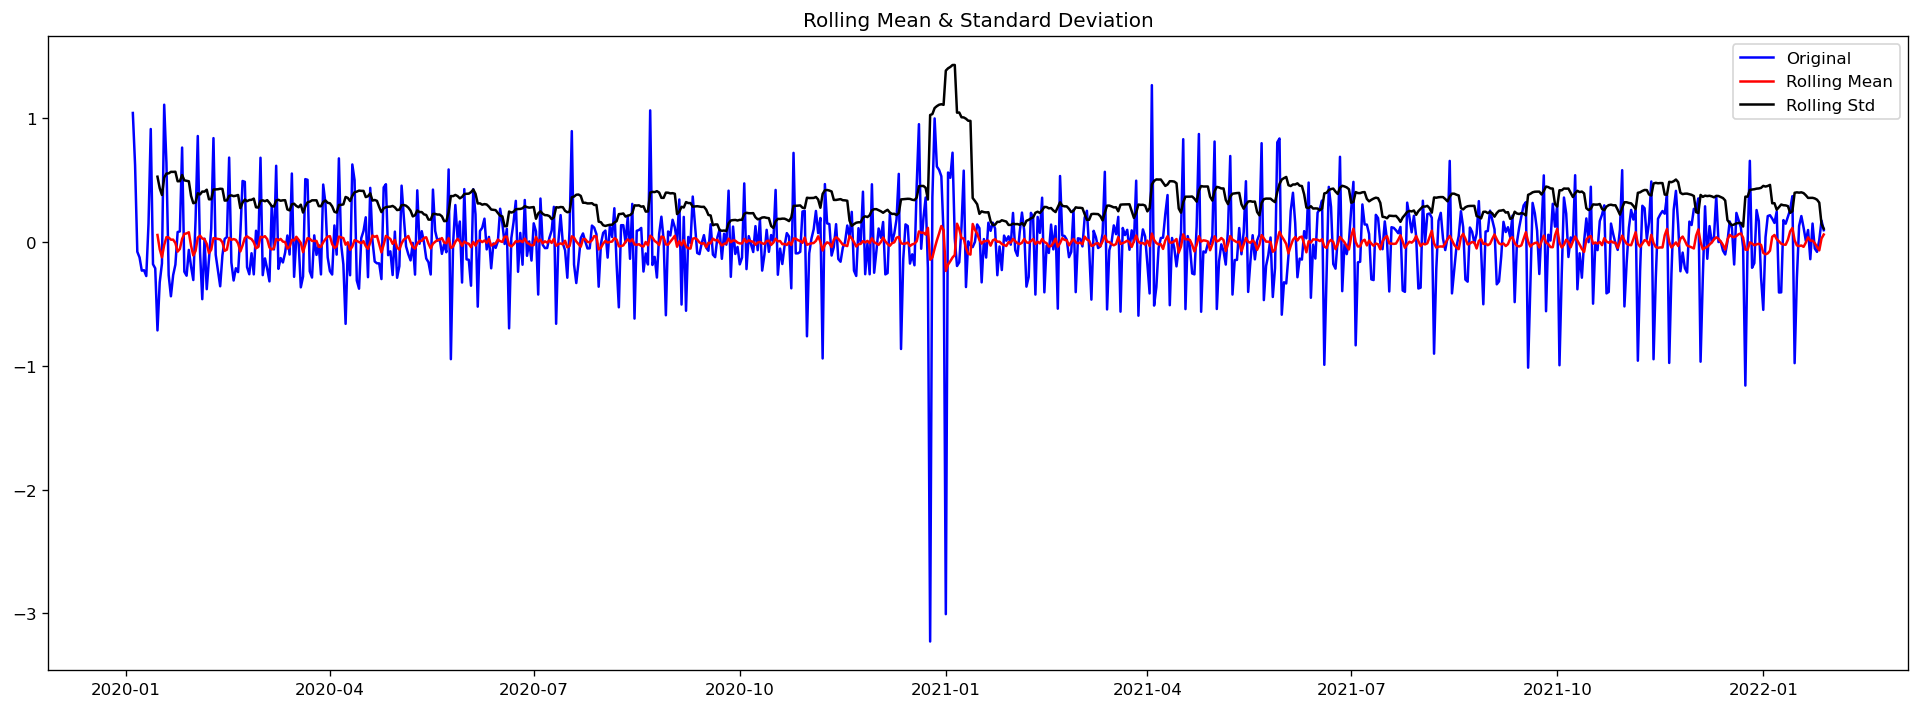

Results of Dickey-Fuller Test:
Test Statistic                -1.152626e+01
p-value                        3.929574e-21
#Lags Used                     1.900000e+01
Number of Observations Used    7.360000e+02
Critical Value (1%)           -3.439266e+00
Critical Value (5%)           -2.865475e+00
Critical Value (10%)          -2.568865e+00
dtype: float64


In [486]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Above is not required as Prophet Model takes case of it.

### TimeSeriesAnalysis/Facebook Prophet - Model Building.ipynb

In [487]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [488]:
df_fb = pd.read_csv("E:/ANALYSIS/03_Working/save/df_daily_fpV2.csv")
df_fb.head(10)

Date_Time_Opened  no_of_cases
0       2020-01-01            2
1       2020-01-02           32
2       2020-01-03           31
3       2020-01-04            2
4       2020-01-05            0
5       2020-01-06           49
6       2020-01-07           46
7       2020-01-08           38
8       2020-01-09           36
9       2020-01-10           26

In [489]:
import pandas as pd
from pandas.tseries.offsets import BDay

In [490]:
isBusinessDay = BDay().onOffset
csv_path = "E:/ANALYSIS/03_Working/save/df_daily_fpV2.csv"
df_fb = pd.read_csv(csv_path)
match_series = pd.to_datetime(df_fb['Date_Time_Opened']).map(isBusinessDay)
df_fb=df_fb[match_series]

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\pandas\core\base.py:880: FutureWarning:

onOffset is a deprecated, use is_on_offset instead.



In [491]:
df_fb.head(20)

Date_Time_Opened  no_of_cases
0        2020-01-01            2
1        2020-01-02           32
2        2020-01-03           31
5        2020-01-06           49
6        2020-01-07           46
7        2020-01-08           38
8        2020-01-09           36
9        2020-01-10           26
12       2020-01-13           32
13       2020-01-14           32
14       2020-01-15           23
15       2020-01-16           32
16       2020-01-17           31
19       2020-01-20           40
20       2020-01-21           35
21       2020-01-22           36
22       2020-01-23           37
23       2020-01-24           38
26       2020-01-27           35
27       2020-01-28           32

In [492]:
df_fb.tail(20)

Date_Time_Opened  no_of_cases
734       2022-01-04          156
735       2022-01-05          170
736       2022-01-06          155
737       2022-01-07          143
740       2022-01-10          176
741       2022-01-11          173
742       2022-01-12          168
743       2022-01-13          168
744       2022-01-14          147
747       2022-01-17          147
748       2022-01-18          160
749       2022-01-19          173
750       2022-01-20          162
751       2022-01-21          144
754       2022-01-24          160
755       2022-01-25          154
756       2022-01-26          172
757       2022-01-27          172
758       2022-01-28          126
761       2022-01-31          143

In [493]:
#EDA

In [494]:
isBusinessDay = BDay().onOffset
csv_path = "E:/ANALYSIS/03_Working/save/df_daily_fpV2.csv"
df_fb1 = pd.read_csv(csv_path)
match_series = pd.to_datetime(df_fb1['Date_Time_Opened']).map(isBusinessDay)
df_fb1=df_fb1[match_series]

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\pandas\core\base.py:880: FutureWarning:

onOffset is a deprecated, use is_on_offset instead.



In [495]:
df_fb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 761
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date_Time_Opened  544 non-null    object
 1   no_of_cases       544 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [496]:
df_fb1['Date_Time_Opened'] = pd.to_datetime(df_fb1['Date_Time_Opened'])

In [497]:
df_fb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 761
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_Time_Opened  544 non-null    datetime64[ns]
 1   no_of_cases       544 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.8 KB


In [498]:
df_fb1 = df_fb1.set_index('Date_Time_Opened', drop=True)

In [499]:
import matplotlib.pyplot as plt 

<AxesSubplot:title={'center':'Tickets raised'}, xlabel='Date_Time_Opened'>

Text(0.5, 0, 'Time_Scale - Days')

Text(0, 0.5, 'Tickets')

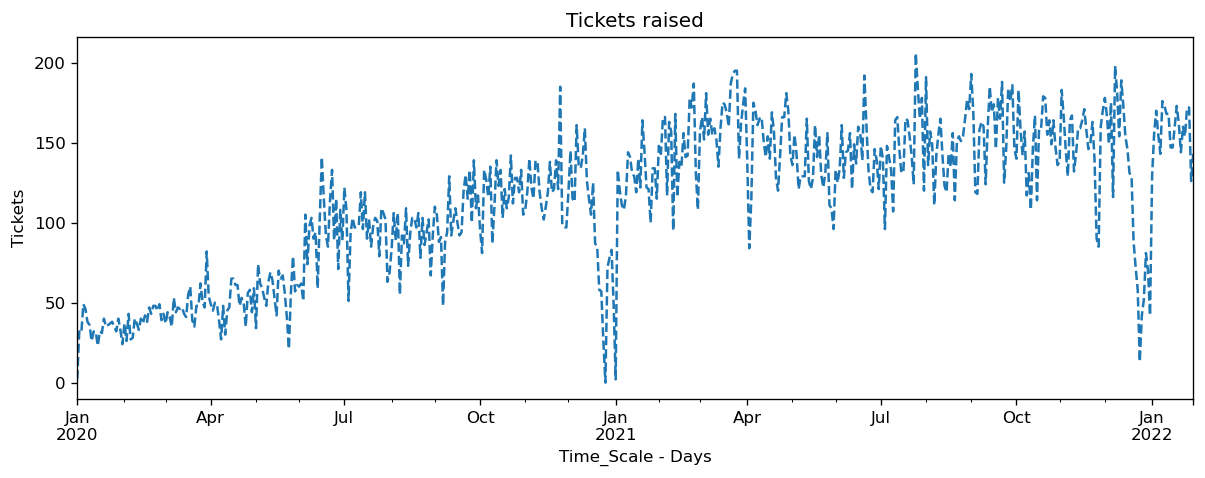

In [500]:
df_fb1['no_of_cases'].plot(figsize=(12,4), title='Tickets raised', ls='--')
plt.xlabel("Time_Scale - Days")
plt.ylabel("Tickets")

<AxesSubplot:title={'center':'Tickets raised'}, xlabel='Date_Time_Opened'>

Text(0.5, 0, 'Time_Scale - Days')

Text(0, 0.5, 'Tickets')

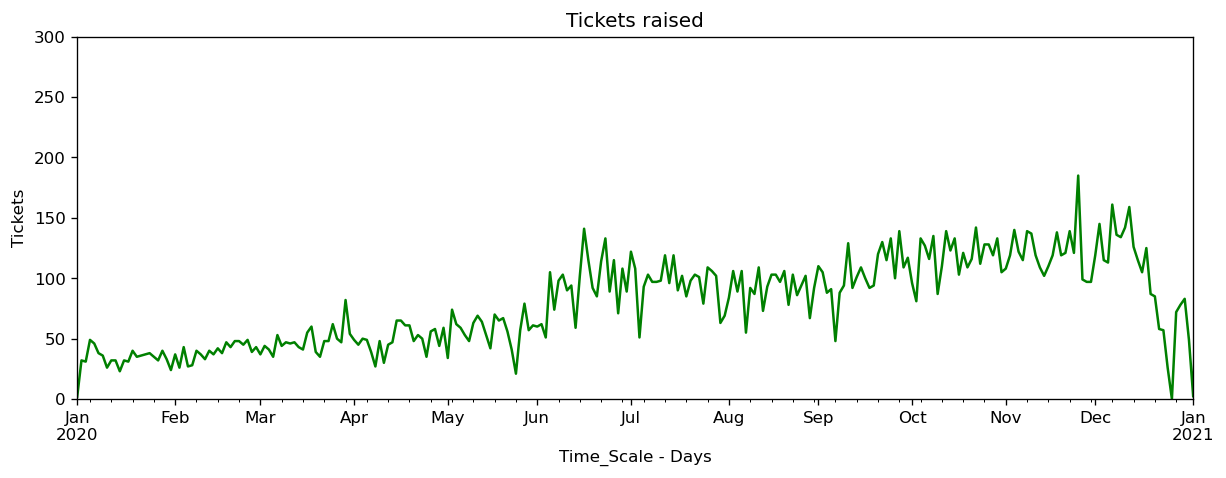

In [501]:
df_fb1['no_of_cases'].plot(xlim=['2020-01-01','2021-01-01'],ylim=[0,300],figsize=(12,4), title='Tickets raised', c='green')
plt.xlabel("Time_Scale - Days")
plt.ylabel("Tickets")

<AxesSubplot:title={'center':'Tickets raised'}, xlabel='Date_Time_Opened'>

Text(0.5, 0, 'Time_Scale - Days')

Text(0, 0.5, 'Tickets')

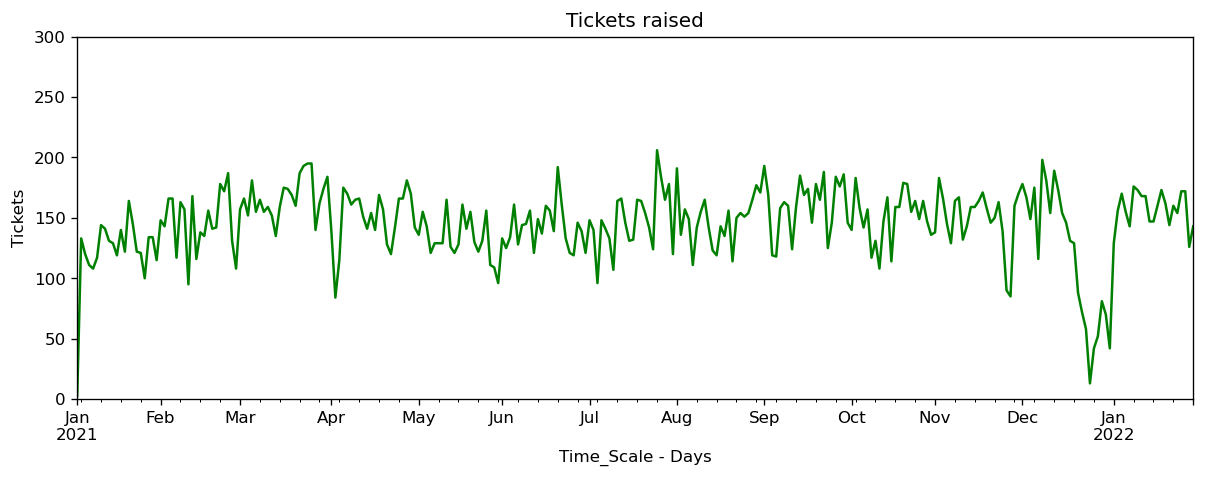

In [502]:
df_fb1['no_of_cases'].plot(xlim=['2021-01-01','2022-01-31'],ylim=[0,300],figsize=(12,4), title='Tickets raised', c='green')
plt.xlabel("Time_Scale - Days")
plt.ylabel("Tickets")

In [503]:
df_fb1.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31'],
              dtype='datetime64[ns]', name='Date_Time_Opened', length=544, freq=None)

In [504]:
len(df_fb1.index)

544

In [505]:
# datetime
from datetime import datetime

In [506]:
datetime(2021,11,1)

datetime.datetime(2021, 11, 1, 0, 0)

In [507]:
# Time Resampling

In [508]:
df_fb1.head()

no_of_cases
Date_Time_Opened             
2020-01-01                  2
2020-01-02                 32
2020-01-03                 31
2020-01-06                 49
2020-01-07                 46

In [509]:
df_fb1.resample(rule='A').min()

no_of_cases
Date_Time_Opened             
2020-12-31                  0
2021-12-31                  2
2022-12-31                126

In [510]:
df_fb1.resample(rule='A').max()

no_of_cases
Date_Time_Opened             
2020-12-31                185
2021-12-31                206
2022-12-31                176

<AxesSubplot:xlabel='Date_Time_Opened'>

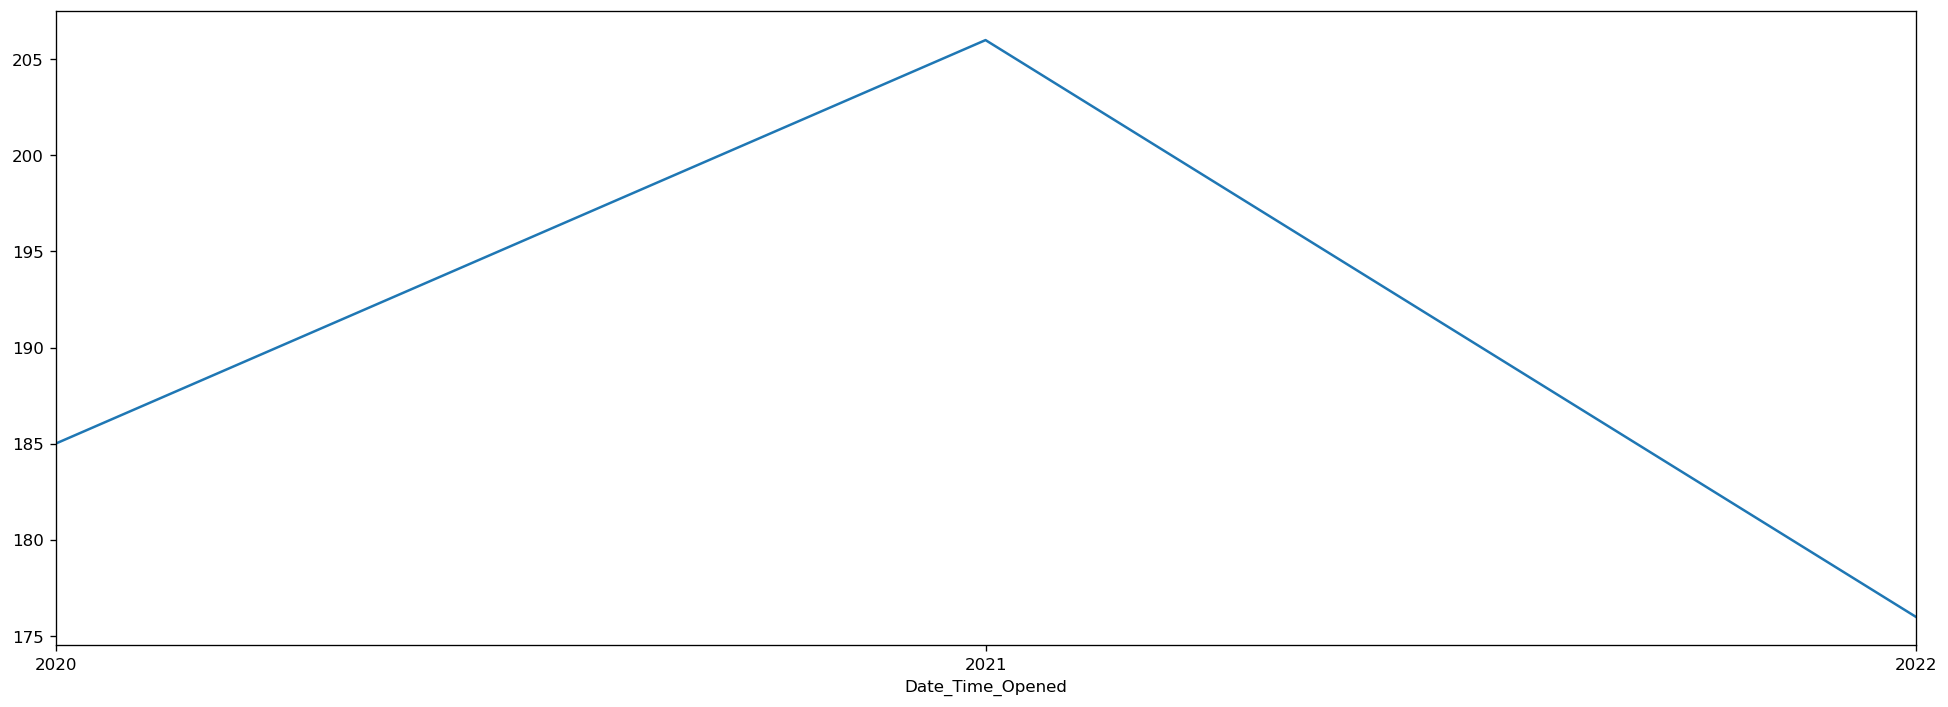

In [511]:
##year end frequency
df_fb1.resample(rule='A').max()['no_of_cases'].plot()

<AxesSubplot:xlabel='Date_Time_Opened'>

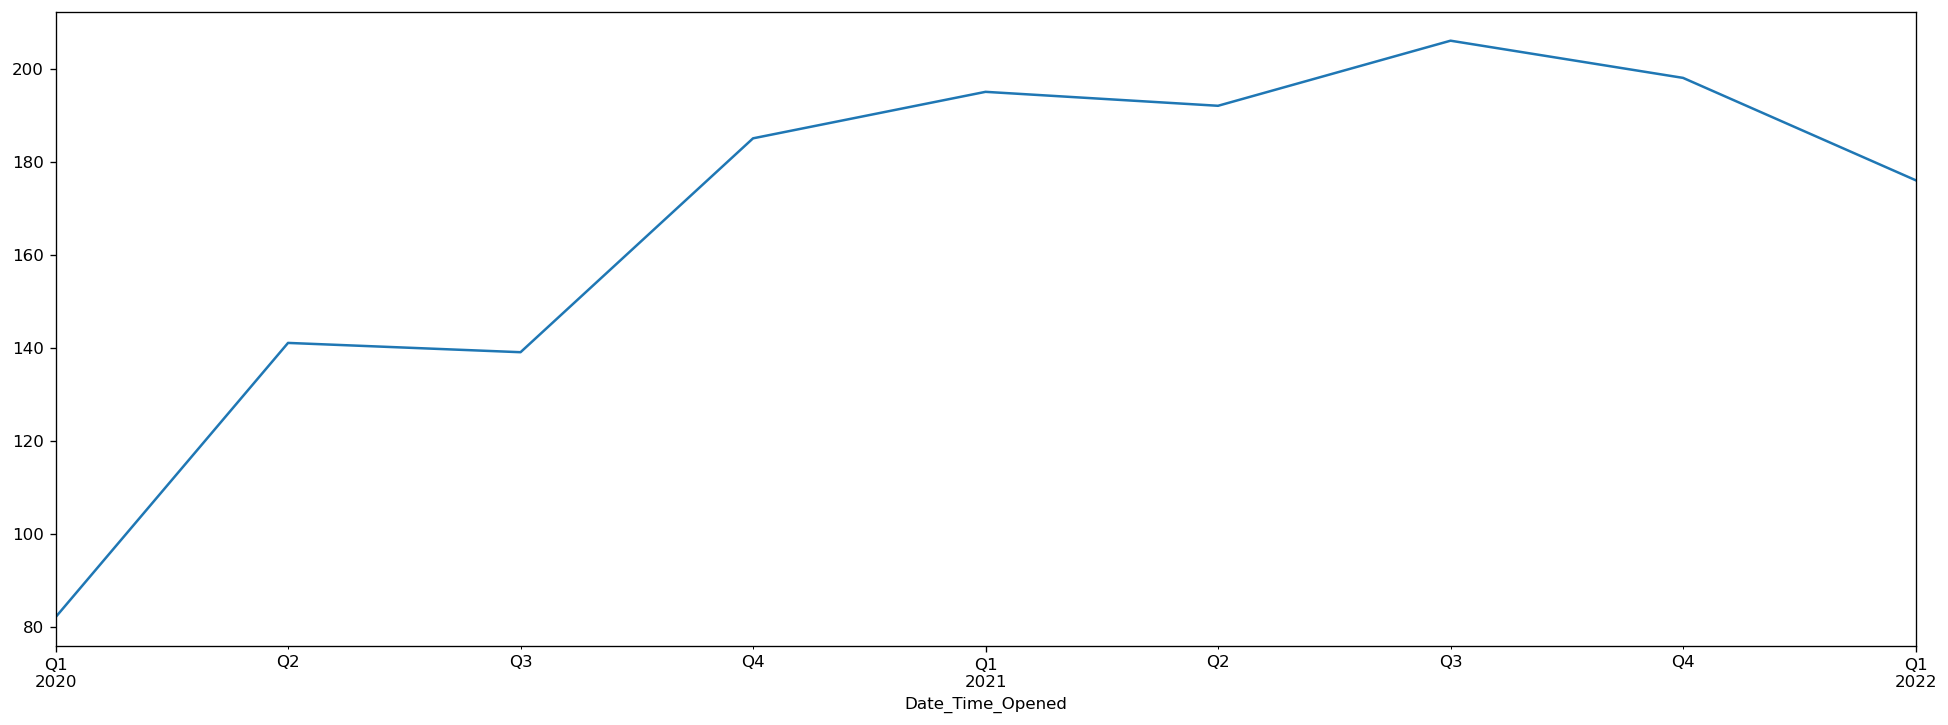

In [512]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_fb1.resample(rule='QS').max()['no_of_cases'].plot()

In [513]:
df_fb1.resample(rule='QS').max()

no_of_cases
Date_Time_Opened             
2020-01-01                 82
2020-04-01                141
2020-07-01                139
2020-10-01                185
2021-01-01                195
2021-04-01                192
2021-07-01                206
2021-10-01                198
2022-01-01                176

In [514]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_fb1.resample(rule='BA').max()

no_of_cases
Date_Time_Opened             
2020-12-31                185
2021-12-31                206
2022-12-30                176

<AxesSubplot:xlabel='Date_Time_Opened'>

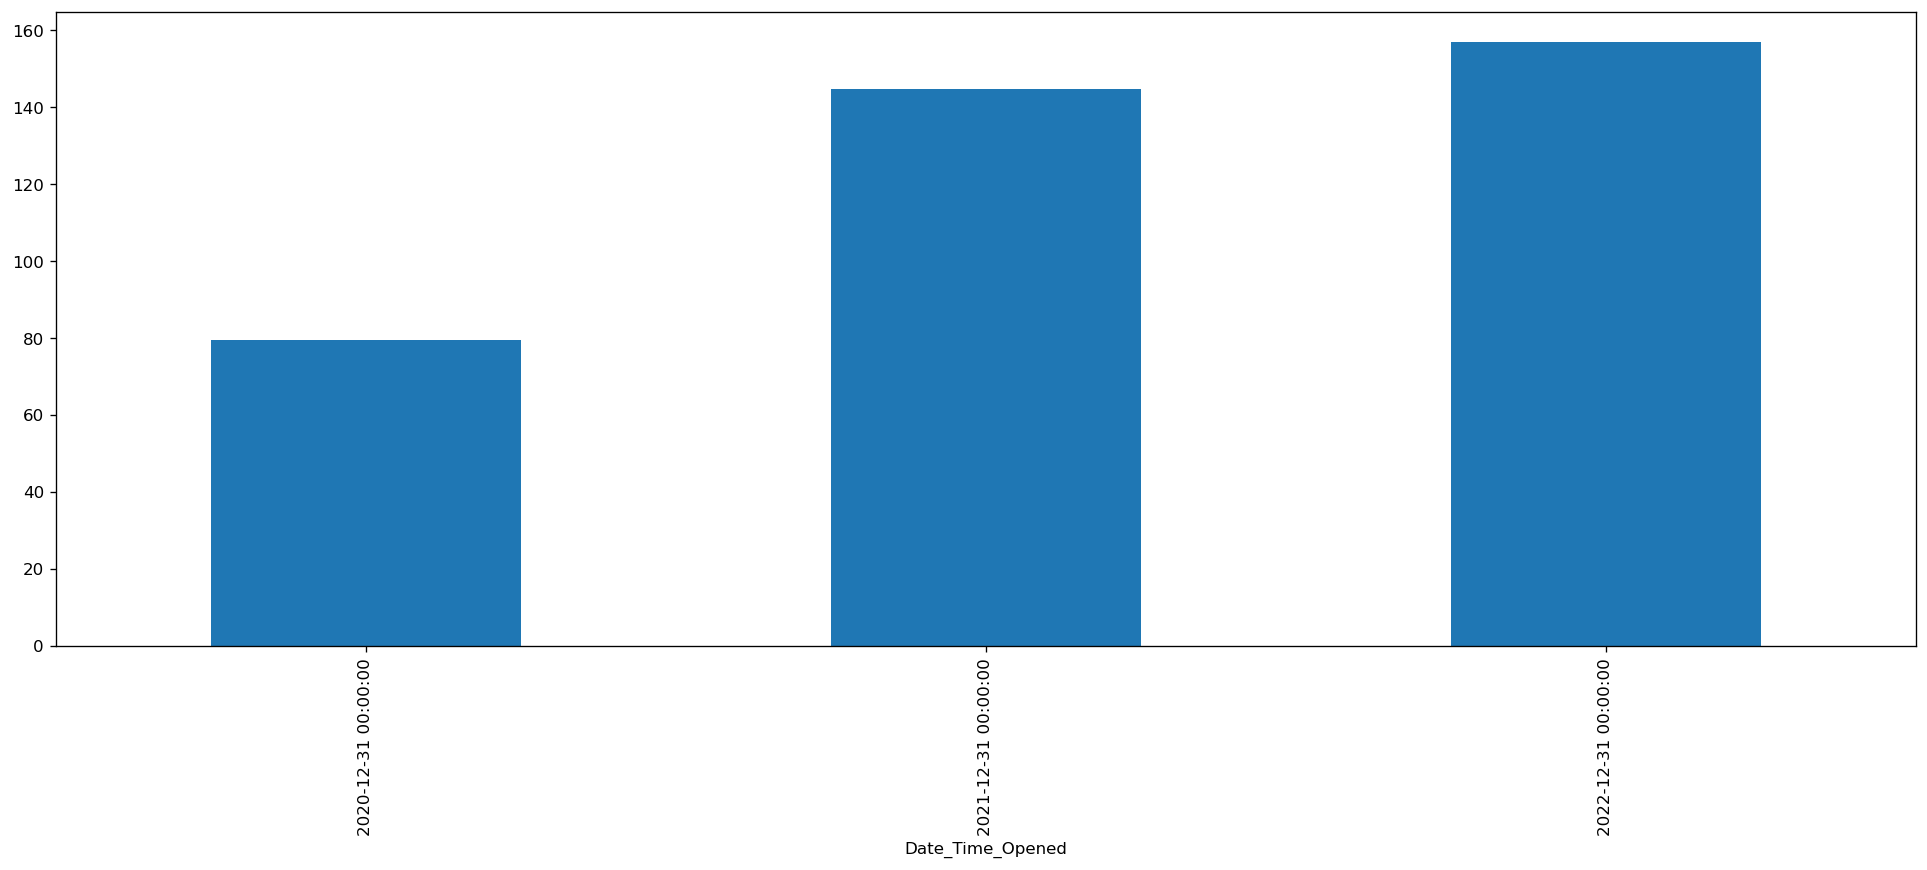

In [515]:
##plotting
df_fb1['no_of_cases'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date_Time_Opened'>

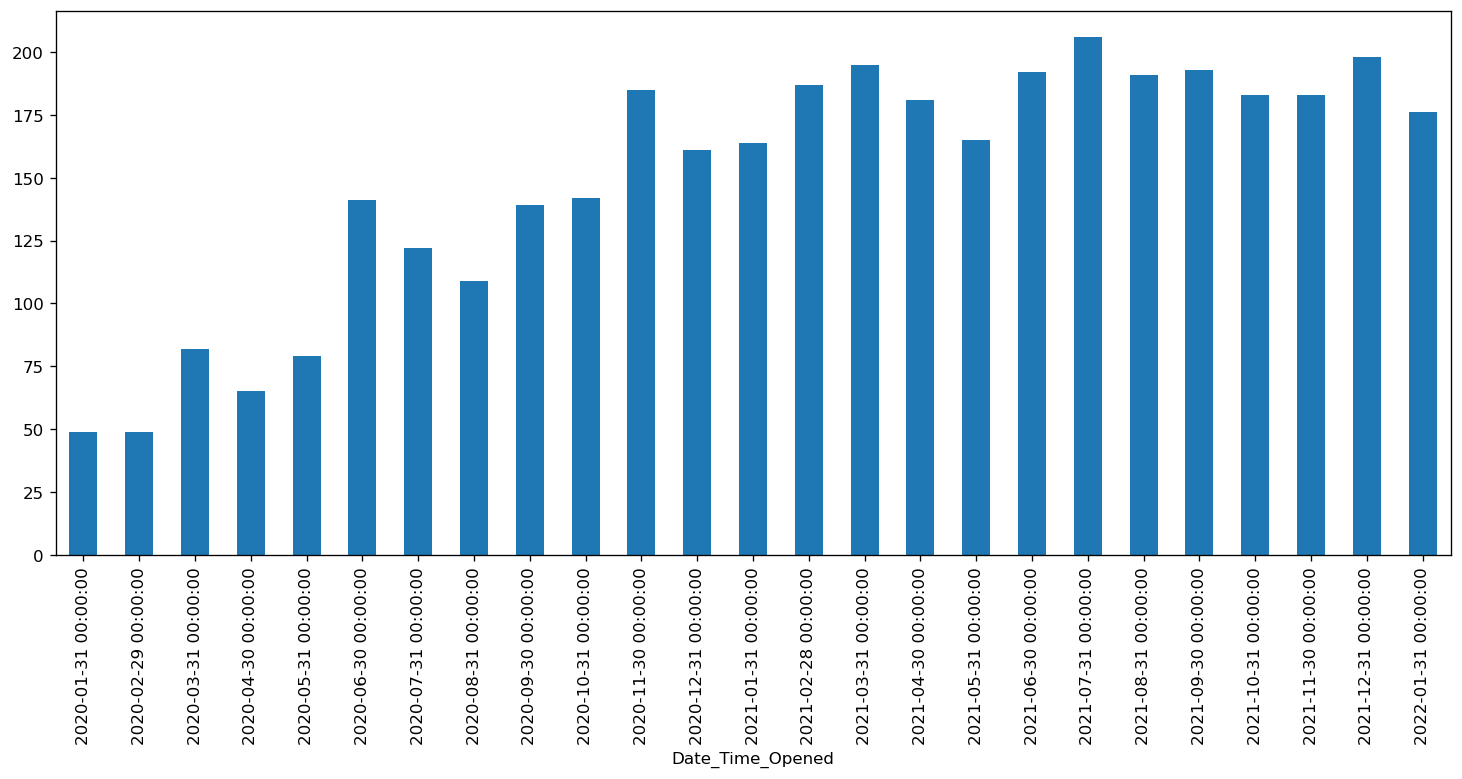

In [516]:
df_fb1['no_of_cases'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [517]:
df_fb1['Open:30 days rolling']=df_fb1['no_of_cases'].rolling(30).mean()

In [518]:
df_fb1.head(31)

no_of_cases  Open:30 days rolling
Date_Time_Opened                                   
2020-01-01                  2                   NaN
2020-01-02                 32                   NaN
2020-01-03                 31                   NaN
2020-01-06                 49                   NaN
2020-01-07                 46                   NaN
2020-01-08                 38                   NaN
2020-01-09                 36                   NaN
2020-01-10                 26                   NaN
2020-01-13                 32                   NaN
2020-01-14                 32                   NaN
2020-01-15                 23                   NaN
2020-01-16                 32                   NaN
2020-01-17                 31                   NaN
2020-01-20                 40                   NaN
2020-01-21                 35                   NaN
2020-01-22                 36                   NaN
2020-01-23                 37                   NaN
2020-01-24                 38                   NaN
2020-01-27                 35                   NaN
2020-01-28                 32                   NaN
2020-01-29                 40                   NaN
2020-01-30                 33                   NaN
2020-01-31                 24                   NaN
2020-02-03                 37                   NaN
2020-02-04                 26                   NaN
2020-02-05                 43                   NaN
2020-02-06                 27                   NaN
2020-02-07                 28                   NaN
2020-02-10                 40                   NaN
2020-02-11                 37             33.266667
2020-02-12                 33             34.300000

<AxesSubplot:xlabel='Date_Time_Opened'>

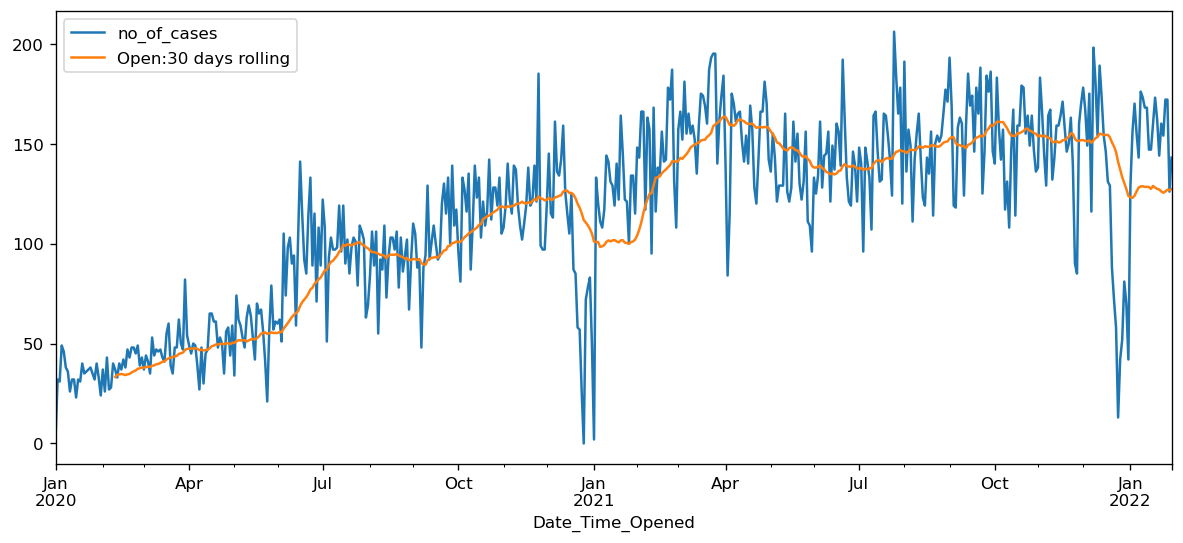

In [519]:
df_fb1[['no_of_cases','Open:30 days rolling']].plot(figsize=(12,5))

In [520]:
# Model Building

In [521]:
df_fb['no_of_cases'] = df_fb['no_of_cases'].replace([0],1)

In [522]:
df_fb = df_fb.rename(columns={'no_of_cases': 'y', 'Date_Time_Opened':'ds'})

In [523]:
df_fb.head(5)

ds   y
0  2020-01-01   2
1  2020-01-02  32
2  2020-01-03  31
5  2020-01-06  49
6  2020-01-07  46

In [ ]:
# Log tansformation on the Columns

# log transformation of the data points that transforms the skewed data to 
# approximately near normality, here we are preserving the original data as well in the column 'y_orig' 

In [524]:
df_fb['y_orig'] = df_fb['y'] # to save a copy of the original data..you'll see why shortly. 
df_fb['y'] = np.log(df_fb['y'])

In [525]:
df_fb

ds         y  y_orig
0    2020-01-01  0.693147       2
1    2020-01-02  3.465736      32
2    2020-01-03  3.433987      31
5    2020-01-06  3.891820      49
6    2020-01-07  3.828641      46
..          ...       ...     ...
755  2022-01-25  5.036953     154
756  2022-01-26  5.147494     172
757  2022-01-27  5.147494     172
758  2022-01-28  4.836282     126
761  2022-01-31  4.962845     143

[544 rows x 3 columns]

In [ ]:
# Model Building

In [ ]:
# The following parameters were added to get desired results. 

# 1. changepoint_prior_scale=0.01 
# 2. seasonality_prior_scale= 0.01

In [526]:
model = Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale= 0.01) #instantiate Prophet
model.fit(df_fb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [527]:
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}

In [528]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

df_fb.tail(5)
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=30, freq = 'D')
future_data.tail(15)

"     'year': 'A',\n        'quarter': 'Q',\n        'month': 'M',\n        'day': 'D',\n        'hour': 'H',\n        'minute': 'T',\n        'second': 'S',\n        'millisecond': 'L',\n        'microsecond': 'U',\n        'nanosecond': 'N'}\n"

ds         y  y_orig
755  2022-01-25  5.036953     154
756  2022-01-26  5.147494     172
757  2022-01-27  5.147494     172
758  2022-01-28  4.836282     126
761  2022-01-31  4.962845     143

ds
559 2022-02-16
560 2022-02-17
561 2022-02-18
562 2022-02-19
563 2022-02-20
564 2022-02-21
565 2022-02-22
566 2022-02-23
567 2022-02-24
568 2022-02-25
569 2022-02-26
570 2022-02-27
571 2022-02-28
572 2022-03-01
573 2022-03-02

In [ ]:
# Predicting Future Values

In [529]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ds      yhat  yhat_lower  yhat_upper
559 2022-02-16  5.225196    4.836083    5.627451
560 2022-02-17  5.217538    4.815058    5.627012
561 2022-02-18  5.041362    4.611040    5.460555
562 2022-02-19  5.238336    4.837200    5.590625
563 2022-02-20  5.256295    4.865498    5.664590
564 2022-02-21  5.324812    4.928170    5.771001
565 2022-02-22  5.344377    4.946000    5.732128
566 2022-02-23  5.346076    4.940631    5.789824
567 2022-02-24  5.320080    4.926755    5.727448
568 2022-02-25  5.123853    4.709543    5.568927
569 2022-02-26  5.299714    4.863051    5.721878
570 2022-02-27  5.296167    4.903213    5.710491
571 2022-02-28  5.343448    4.920400    5.735977
572 2022-03-01  5.342683    4.926003    5.763293
573 2022-03-02  5.325552    4.914942    5.732950

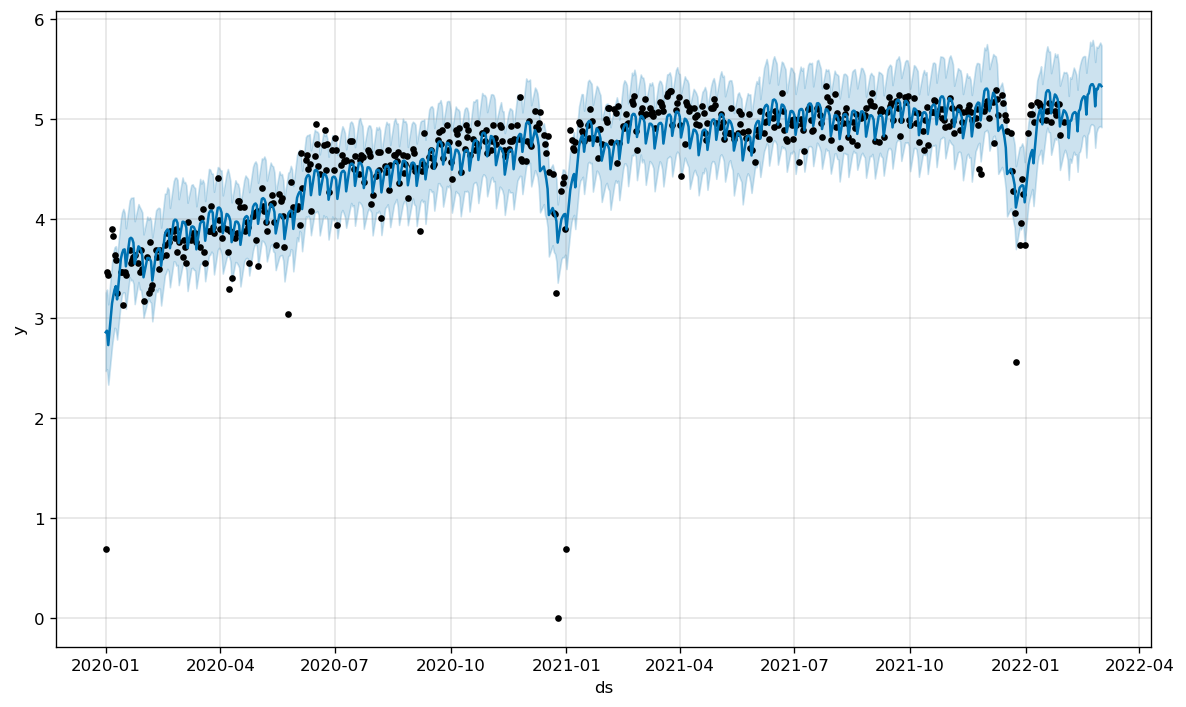

In [530]:
model.plot(forecast_data);

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



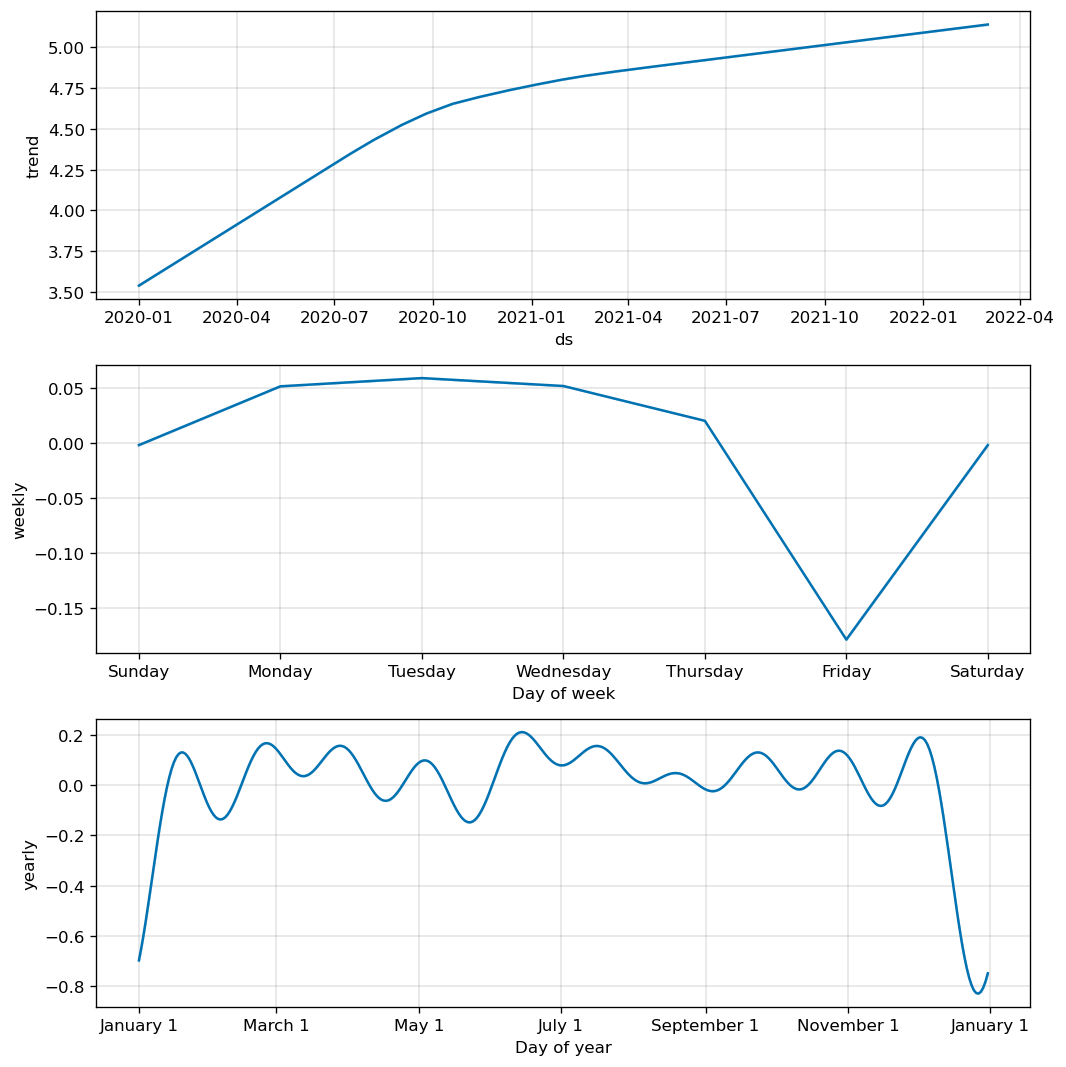

In [531]:
model.plot_components(forecast_data);

In [532]:
from prophet.plot import add_changepoints_to_plot

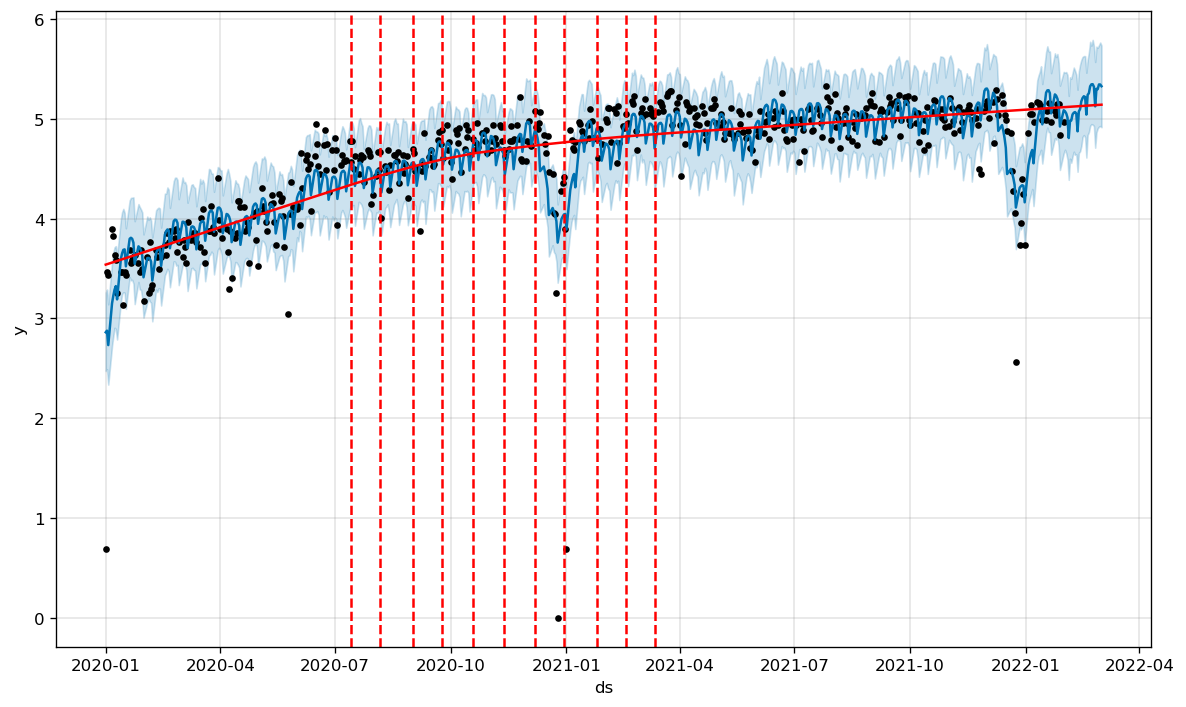

In [533]:
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

In [534]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

In [535]:
forecast_data_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

ds        yhat  yhat_lower  yhat_upper
559 2022-02-16  185.897656  125.974908  277.952818
560 2022-02-17  184.479376  123.353933  277.830784
561 2022-02-18  154.680551  100.588743  235.228019
562 2022-02-19  188.356379  126.115715  267.902962
563 2022-02-20  191.769679  129.735472  288.469570
564 2022-02-21  205.369845  138.126447  320.858768
565 2022-02-22  209.427451  140.611421  308.625418
566 2022-02-23  209.783587  139.858469  326.955401
567 2022-02-24  204.400271  137.931248  307.184454
568 2022-02-25  167.981310  111.001370  262.152724
569 2022-02-26  200.279451  129.418515  305.477977
570 2022-02-27  199.570404  134.721981  302.019346
571 2022-02-28  209.232941  137.057416  309.815533
572 2022-03-01  209.072964  137.827556  318.395117
573 2022-03-02  205.521732  136.311434  308.879260

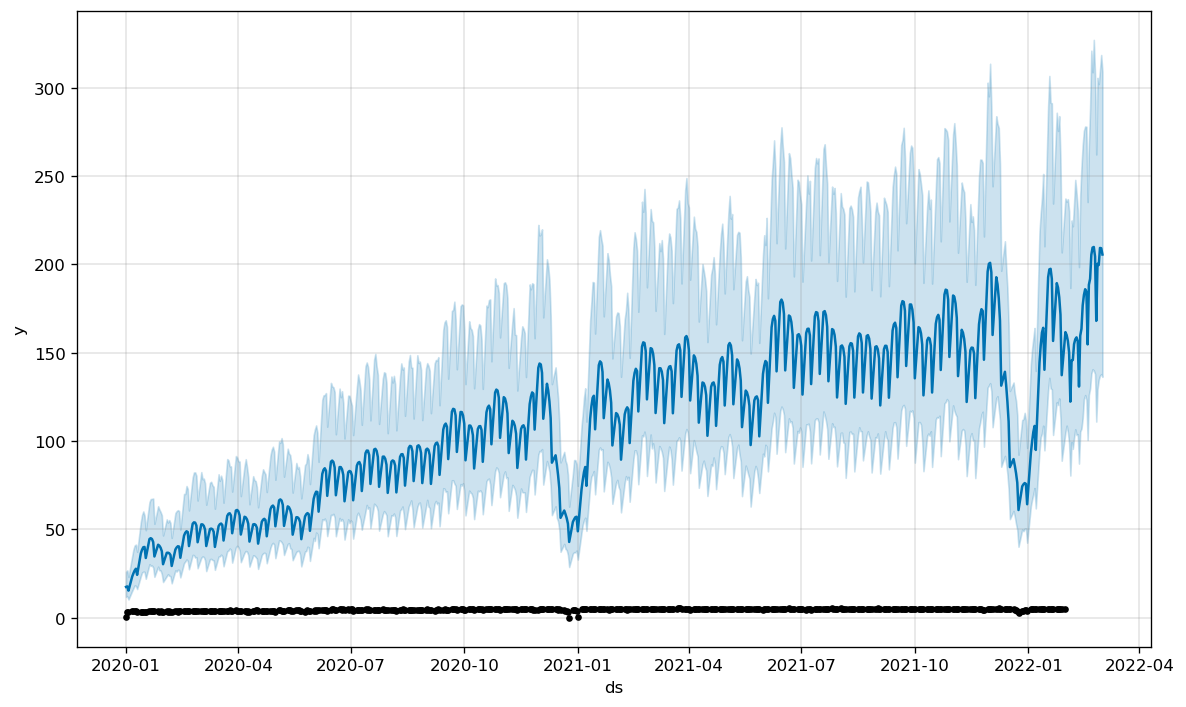

In [536]:
model.plot(forecast_data_orig);

In [537]:
df_fb['y_log']=df_fb['y'] #copy the log-transformed data to another column
df_fb['y']=df_fb['y_orig']

In [538]:
final_df = pd.DataFrame(forecast_data_orig)

In [539]:
final_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2020-01-01  17.467945   11.853100   26.001639
1 2020-01-02  17.754093   12.059185   26.809146
2 2020-01-03  15.364053   10.340277   23.112369
3 2020-01-06  23.348247   15.247933   34.910024
4 2020-01-07  25.174122   16.786585   38.640248

In [540]:
final_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
569 2022-02-26  200.279451  129.418515  305.477977
570 2022-02-27  199.570404  134.721981  302.019346
571 2022-02-28  209.232941  137.057416  309.815533
572 2022-03-01  209.072964  137.827556  318.395117
573 2022-03-02  205.521732  136.311434  308.879260

In [541]:
import plotly.graph_objs as go
import plotly.offline as py

In [542]:
# #Plot predicted and actual line graph with X=dates, Y=Outbound
# actual_chart = go.Scatter(y=df_fb["y_orig"], name= 'Actual')
# predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
# predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
# predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
# py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
# #py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

In [543]:
actual_chart = go.Scatter(x=df_fb['ds'],y=df_fb["y_orig"], name= 'Actual')
predict_chart = go.Scatter(x=df_fb['ds'],y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(x=df_fb['ds'],y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(x=df_fb['ds'],y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)

'temp-plot.html'

In [544]:
#Cross Validation for MAPE

In [545]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='544 days', period='15 days', horizon = '30 days')


INFO:prophet:Making 13 forecasts with cutoffs between 2021-07-05 00:00:00 and 2022-01-01 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.appe

In [546]:
df_cv.head()

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2021-07-06  5.409254    4.917459    5.895505  4.997212 2021-07-05
1 2021-07-07  5.406806    4.958037    5.827302  4.948760 2021-07-05
2 2021-07-08  5.407718    4.964129    5.879732  4.890349 2021-07-05
3 2021-07-09  5.236550    4.772433    5.724734  4.672829 2021-07-05
4 2021-07-12  5.495915    5.001223    5.945931  5.099866 2021-07-05

In [ ]:
# Checking Model Performance here 

In [ ]:
# The below table shows the output of performance metrics to compute some useful statistics of the prediction performance.

# The statistics computed are: 

# 1. mean squared error (MSE), 
# 2. root mean squared error (RMSE), 
# 3. mean absolute error (MAE), 
# 4. mean absolute percent error (MAPE),  
# 5. median absolute percent error (MDAPE)
# 6. symmetric mean absolute percent error (SMAPE)
# 7. coverage

In [547]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail(30)

horizon       mse      rmse       mae      mape     mdape     smape  \
0   3 days  0.089389  0.298980  0.260854  0.052747  0.048499  0.051830   
1   4 days  0.102943  0.320847  0.273783  0.055498  0.047691  0.054815   
2   5 days  0.114315  0.338104  0.296259  0.060464  0.050172  0.059556   
3   6 days  0.093389  0.305596  0.259677  0.053386  0.040470  0.052665   
4   7 days  0.182506  0.427208  0.301976  0.073254  0.044854  0.066344   
5   8 days  0.202264  0.449738  0.321701  0.077237  0.045385  0.069627   
6   9 days  0.229088  0.478631  0.367433  0.085656  0.060441  0.077640   
7  10 days  0.169323  0.411489  0.363065  0.076061  0.069768  0.072600   
8  11 days  0.138283  0.371864  0.321570  0.067863  0.057129  0.065083   
9  12 days  0.113999  0.337637  0.288663  0.060626  0.050506  0.058386   
10 13 days  0.076616  0.276796  0.234010  0.047863  0.040941  0.046599   
11 14 days  0.095436  0.308927  0.264010  0.054434  0.043430  0.052694   
12 15 days  0.096451  0.310566  0.276180  0.056522  0.051255  0.054929   
13 16 days  0.110567  0.332516  0.305106  0.062126  0.059798  0.060189   
14 17 days  0.101449  0.318510  0.294402  0.058910  0.059798  0.057284   
15 18 days  0.110914  0.333038  0.308975  0.062242  0.060220  0.060547   
16 19 days  0.099202  0.314963  0.286682  0.057500  0.053121  0.056313   
17 20 days  0.112409  0.335275  0.301333  0.060960  0.061392  0.059479   
18 21 days  0.097374  0.312048  0.276609  0.056182  0.052538  0.054766   
19 22 days  0.189619  0.435453  0.332159  0.078437  0.058749  0.071365   
20 23 days  0.208833  0.456982  0.344660  0.081163  0.058749  0.073537   
21 24 days  0.244676  0.494647  0.386922  0.090219  0.062806  0.081678   
22 25 days  0.164180  0.405191  0.341836  0.071673  0.068844  0.068142   
23 26 days  0.117109  0.342212  0.283096  0.059697  0.048054  0.057157   
24 27 days  0.092562  0.304240  0.244995  0.051276  0.040295  0.049328   
25 28 days  0.074657  0.273235  0.219297  0.044589  0.037996  0.043183   
26 29 days  0.100089  0.316369  0.263782  0.054176  0.039484  0.052211   
27 30 days  0.096024  0.309877  0.274059  0.055920  0.054873  0.054177   

    coverage  
0   0.814815  
1   0.740741  
2   0.703704  
3   0.786008  
4   0.839506  
5   0.859259  
6   0.781481  
7   0.740741  
8   0.777778  
9   0.814815  
10  0.893004  
11  0.831276  
12  0.888889  
13  0.900000  
14  0.962963  
15  0.925926  
16  0.888889  
17  0.855967  
18  0.897119  
19  0.866667  
20  0.814815  
21  0.740741  
22  0.740741  
23  0.851852  
24  0.897119  
25  0.925926  
26  0.785185  
27  0.818519

In [ ]:
# Cross-validation performance metrics are visualized with “plot_cross_validation_metric” for RSME and MAPE.

In [548]:
# Visualizing Performance Metrics
from prophet.plot import plot_cross_validation_metric

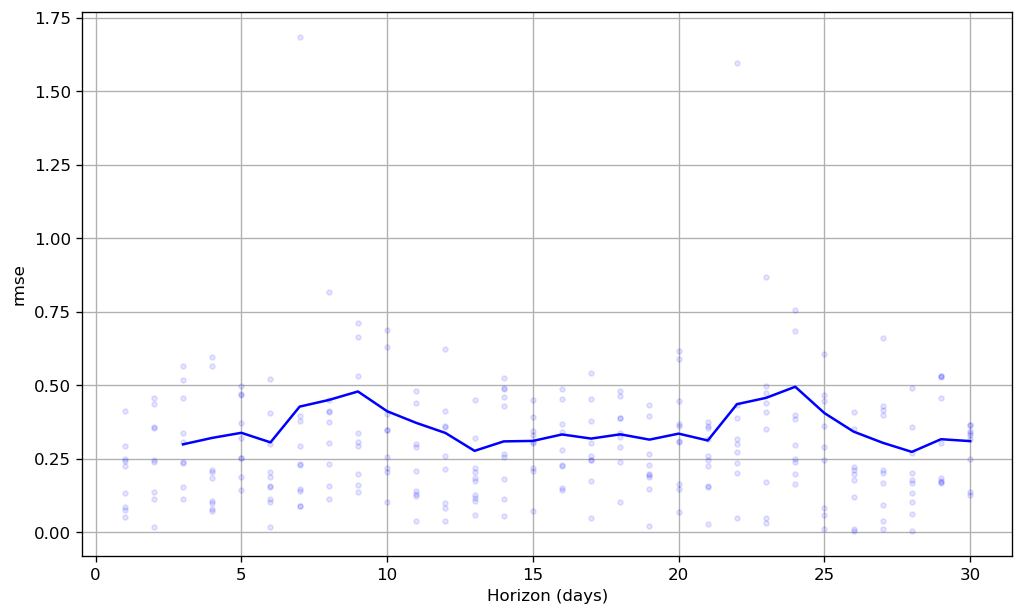

In [549]:
plot_cross_validation_metric(df_cv, metric='rmse');

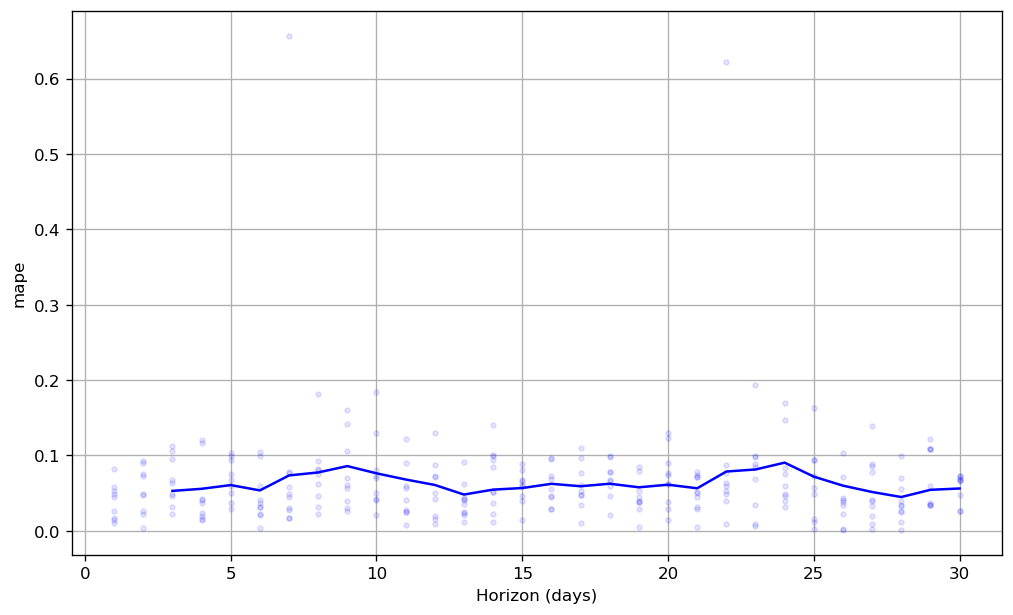

In [550]:
plot_cross_validation_metric(df_cv, metric='mape');

In [551]:
cutoffs = pd.to_datetime(['2020-12-31', '2021-01-01', '2021-12-31', '2022-01-01'])

In [ ]:
# To find the best parameters

In [552]:
# import itertools
# import numpy as np
# import pandas as pd

# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(df_fb)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

In [553]:
# best_params = all_params[np.argmin(rmses)]
# print(best_params)